Clean Notebook for NGC253

Featuring:

HCO+ 4-3
HCN 4-3
H13CN 4-3

HCN_J1-0
HCO+_J1-0
H13CO+_J1-0_and_SiO_J2-1
H13CN_J1-0
CO_J3-2

Part 1: Updates

Part 2: File Reads, Integrated Maps

Part 3: Moment Maps

Part 4: Image Ratios

Part 5: Channel Maps

Part 6: PV Plots

Part 7: Reporojection

Part 8: Spectra

# Part 1: Updates

In [ ]:
!pip install git+https://github.com/astropy/astropy
!pip install reproject
!pip install git+https://github.com/radio-astro-tools/spectral-cube.git
!pip install pyspeckit
!pip install regions

In [106]:


import astropy
print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes

from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
print('reproject',reproject.__version__)
import spectral_cube
print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk                     
# Suppress warnings we don't care about:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline                             


  Cloning https://github.com/astropy/astropy to /tmp/pip-req-build-vdruldyf
  Running command git clone -q https://github.com/astropy/astropy /tmp/pip-req-build-vdruldyf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
You should consider upgrading via the '/home/ben/miniconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ben/miniconda3/bin/python -m pip install --upgrade pip' command.
  Cloning https://github.com/radio-astro-tools/spectral-cube.git to /tmp/pip-req-build-yue2wyby
  Running command git clone -q https://github.com/radio-astro-tools/spectral-cube.git /tmp/pip-req-build-yue2wyby
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
You should consider upgrading via the '/home/ben/miniconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the 

# Part 2: File Reads, Moment Maps

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (11.89569316, -25.29536925)>
[316, 286] [750, 686]


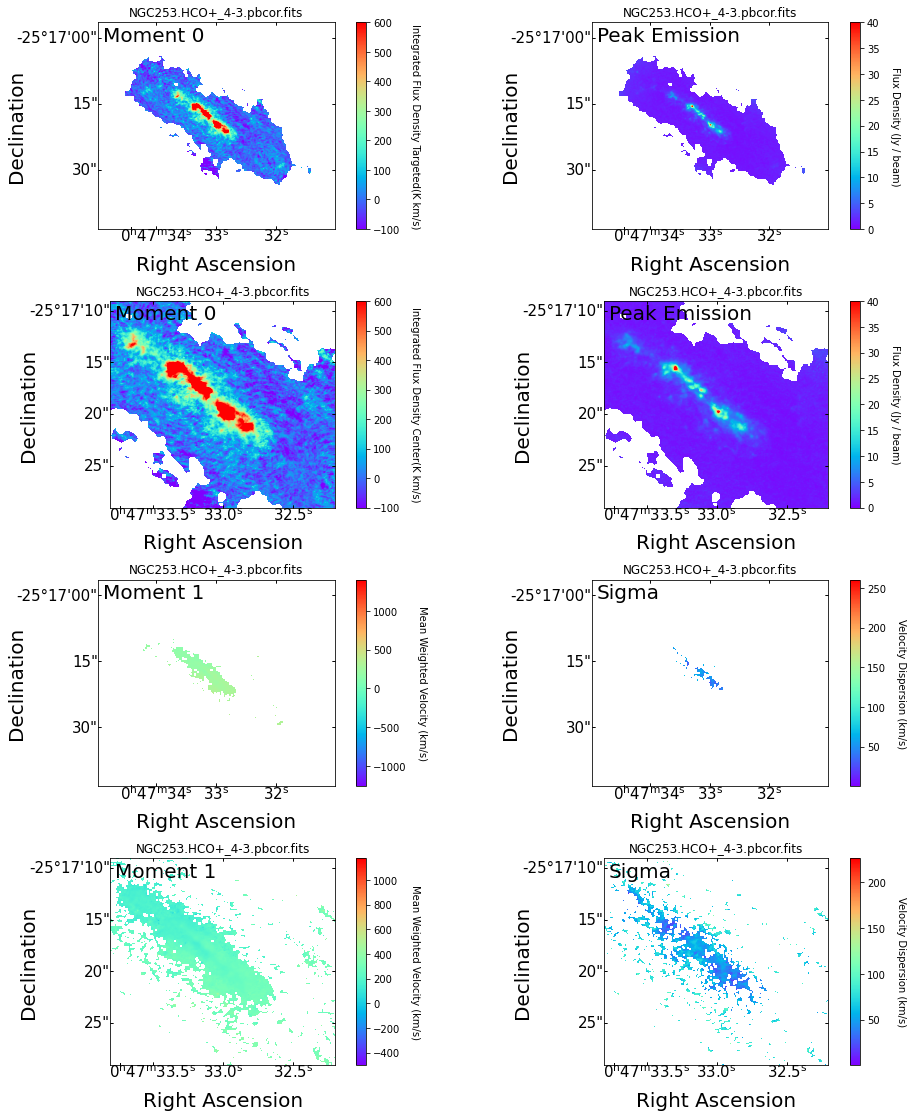

In [108]:
#HCO+ 4-3

path = 'NGC253.HCO+_4-3.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

moment_0  = cube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map   = cube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1  = cube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map = cube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpix = pylab.where(moment_0.hdu.data<10)                 # Get ready to mask the data based on moment map
moment_1.hdu.data[badpix] = np.nan                          # Mask the moment 1 map
sigma_map.hdu.data[badpix] = np.nan                         # Mask the velocity dispersion map

######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
from astropy.coordinates import SkyCoord

cen_p1 = SkyCoord('00h47m33.8s', '-25d17m29s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m09s', frame='icrs')

sc = SpectralCube.read(path)
scW = sc.wcs[:][:][0]
p1Q = scW.pixel_to_world(0,0)
print(p1Q)

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
print(raDP1,raDP2)

subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpixS = pylab.where(moment_0_sub.hdu.data<10)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
ax1 = pylab.subplot(4,2,1,projection=w1) 
RA = ax1.coords[0]                                                                  # 
Dec = ax1.coords[1]
im1 = pylab.imshow(moment_0.hdu.data,cmap='rainbow',vmin=-100,vmax=600)
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax2 = pylab.subplot(4,2,2, projection=w1)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(max_map.data,cmap='rainbow',vmin=0,vmax=40)
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax3 = pylab.subplot(4,2,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=600)

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax4 = pylab.subplot(4,2,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=40)
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)

ax1.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax2.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax3.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax4.set_title("NGC253.HCO+_4-3.pbcor.fits")

#########Moment 1 and Sigma

ax5 = pylab.subplot(4,2,5,projection=w1) 

RA = ax5.coords[0]                                                                  # 
Dec = ax5.coords[1]
im5 = pylab.imshow(moment_1.hdu.data,cmap='rainbow')

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax6 = pylab.subplot(4,2,6, projection=w1)
RA = ax6.coords[0]                                                                  # 
Dec = ax6.coords[1]
im6=pylab.imshow(sigma_map.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax7 = pylab.subplot(4,2,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow')
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax8 = pylab.subplot(4,2,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)
ax5.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax6.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax7.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax8.set_title("NGC253.HCO+_4-3.pbcor.fits")

fig1.savefig("NGC253_HCO+_4-3_Integrated_Full_Note.jpeg")



<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (11.89569316, -25.29536925)>
[316, 286] [750, 686]


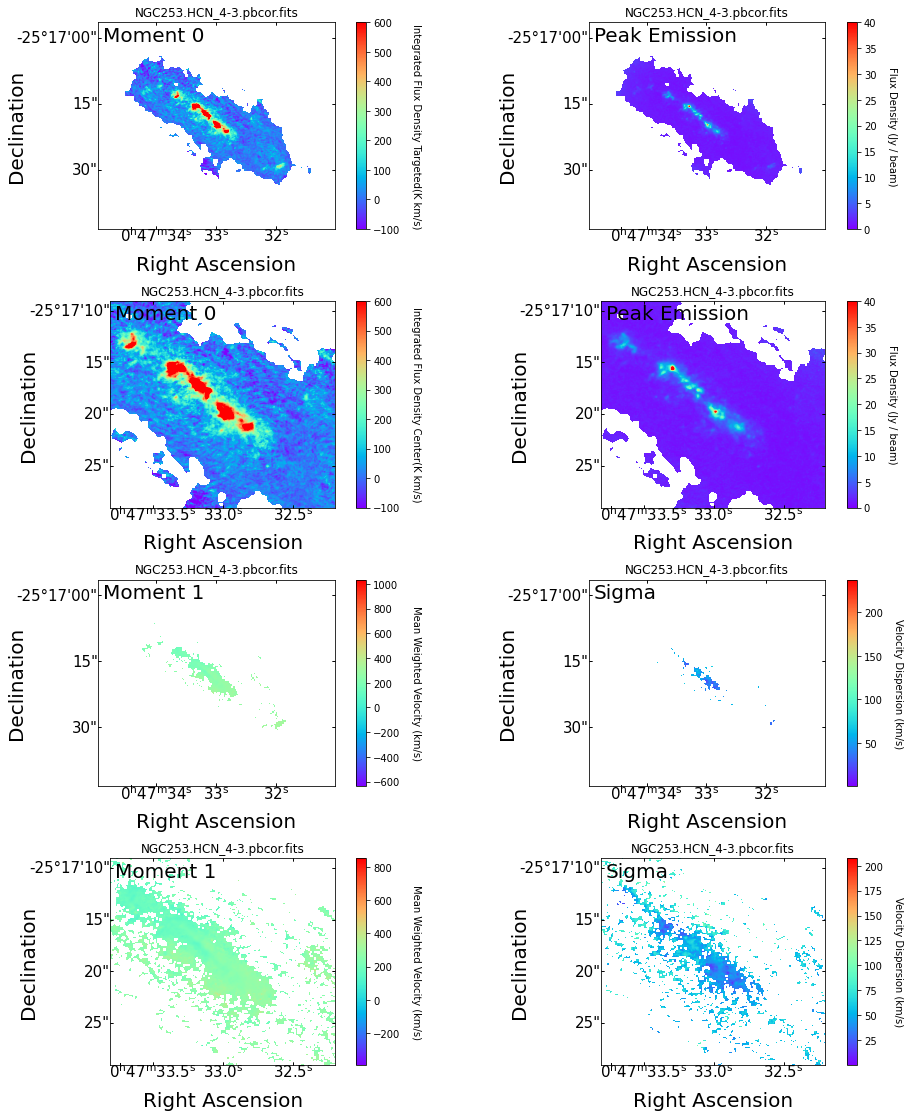

In [109]:
#HCN 4-3


path = 'NGC253.HCN_4-3.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

moment_0  = cube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map   = cube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1  = cube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map = cube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpix = pylab.where(moment_0.hdu.data<10)                 # Get ready to mask the data based on moment map
moment_1.hdu.data[badpix] = np.nan                          # Mask the moment 1 map
sigma_map.hdu.data[badpix] = np.nan                         # Mask the velocity dispersion map

######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
from astropy.coordinates import SkyCoord

cen_p1 = SkyCoord('00h47m33.8s', '-25d17m29s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m09s', frame='icrs')

sc = SpectralCube.read(path)
scW = sc.wcs[:][:][0]
p1Q = scW.pixel_to_world(0,0)
print(p1Q)

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
print(raDP1,raDP2)

subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpixS = pylab.where(moment_0_sub.hdu.data<10)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
ax1 = pylab.subplot(4,2,1,projection=w1) 
RA = ax1.coords[0]                                                                  # 
Dec = ax1.coords[1]
im1 = pylab.imshow(moment_0.hdu.data,cmap='rainbow',vmin=-100,vmax=600)
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax2 = pylab.subplot(4,2,2, projection=w1)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(max_map.data,cmap='rainbow',vmin=0,vmax=40)
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax3 = pylab.subplot(4,2,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=600)

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax4 = pylab.subplot(4,2,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=40)
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)

ax1.set_title("NGC253.HCN_4-3.pbcor.fits")
ax2.set_title("NGC253.HCN_4-3.pbcor.fits")
ax3.set_title("NGC253.HCN_4-3.pbcor.fits")
ax4.set_title("NGC253.HCN_4-3.pbcor.fits")

#########Moment 1 and Sigma

ax5 = pylab.subplot(4,2,5,projection=w1) 

RA = ax5.coords[0]                                                                  # 
Dec = ax5.coords[1]
im5 = pylab.imshow(moment_1.hdu.data,cmap='rainbow')

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax6 = pylab.subplot(4,2,6, projection=w1)
RA = ax6.coords[0]                                                                  # 
Dec = ax6.coords[1]
im6=pylab.imshow(sigma_map.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax7 = pylab.subplot(4,2,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow')
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax8 = pylab.subplot(4,2,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)
ax5.set_title("NGC253.HCN_4-3.pbcor.fits")
ax6.set_title("NGC253.HCN_4-3.pbcor.fits")
ax7.set_title("NGC253.HCN_4-3.pbcor.fits")
ax8.set_title("NGC253.HCN_4-3.pbcor.fits")

fig1.savefig("NGC253.HCN_4-3_Integrated_Full_Note.jpeg")




<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (11.89569316, -25.29536925)>
[316, 286] [750, 686]


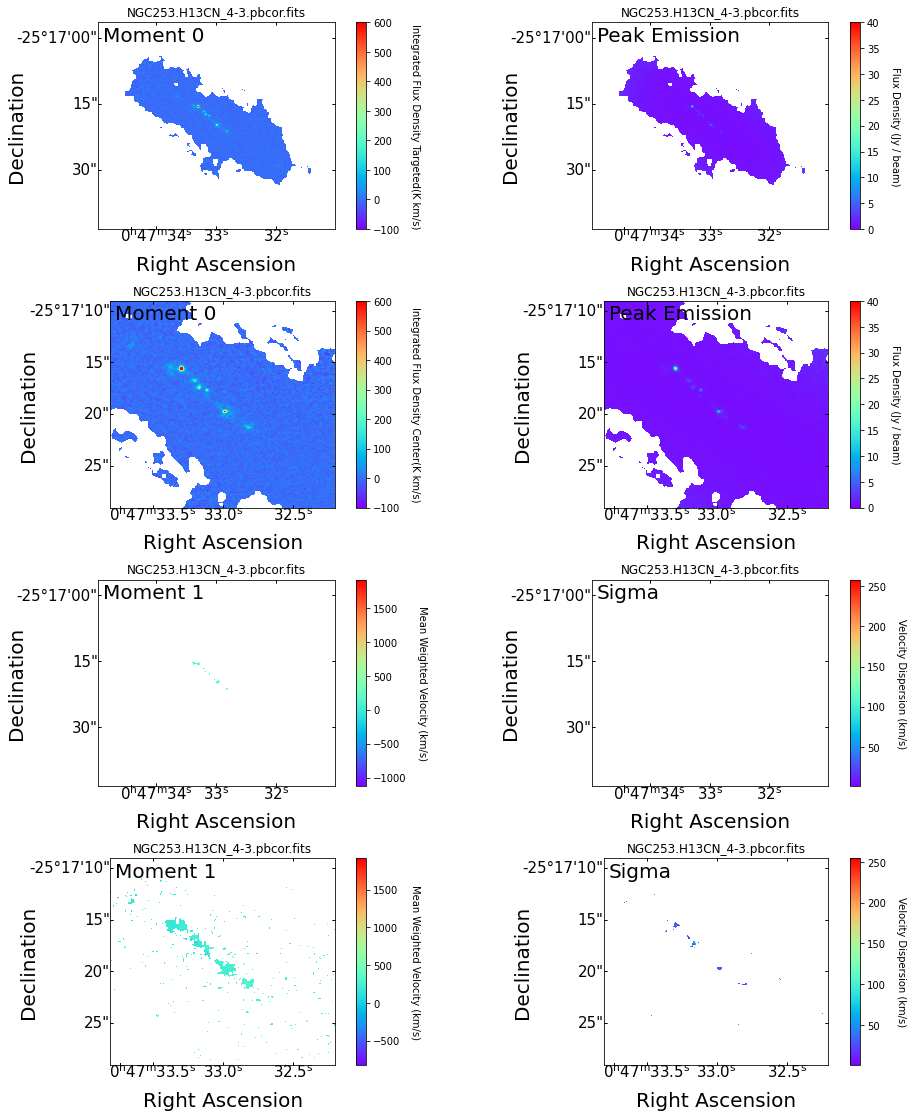

In [110]:
#H13CN 4-3




path = 'NGC253.H13CN_4-3.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

moment_0  = cube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map   = cube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1  = cube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map = cube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpix = pylab.where(moment_0.hdu.data<2)                 # Get ready to mask the data based on moment map
moment_1.hdu.data[badpix] = np.nan                          # Mask the moment 1 map
sigma_map.hdu.data[badpix] = np.nan                         # Mask the velocity dispersion map

######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
from astropy.coordinates import SkyCoord

cen_p1 = SkyCoord('00h47m33.8s', '-25d17m29s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m09s', frame='icrs')

sc = SpectralCube.read(path)
scW = sc.wcs[:][:][0]
p1Q = scW.pixel_to_world(0,0)
print(p1Q)

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
print(raDP1,raDP2)

subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpixS = pylab.where(moment_0_sub.hdu.data<2)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
ax1 = pylab.subplot(4,2,1,projection=w1) 
RA = ax1.coords[0]                                                                  # 
Dec = ax1.coords[1]
im1 = pylab.imshow(moment_0.hdu.data,cmap='rainbow',vmin=-100,vmax=600)
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax2 = pylab.subplot(4,2,2, projection=w1)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(max_map.data,cmap='rainbow',vmin=0,vmax=40)
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax3 = pylab.subplot(4,2,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=600)

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax4 = pylab.subplot(4,2,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=40)
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)

ax1.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax2.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax3.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax4.set_title("NGC253.H13CN_4-3.pbcor.fits")

#########Moment 1 and Sigma

ax5 = pylab.subplot(4,2,5,projection=w1) 

RA = ax5.coords[0]                                                                  # 
Dec = ax5.coords[1]
im5 = pylab.imshow(moment_1.hdu.data,cmap='rainbow')

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax6 = pylab.subplot(4,2,6, projection=w1)
RA = ax6.coords[0]                                                                  # 
Dec = ax6.coords[1]
im6=pylab.imshow(sigma_map.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax7 = pylab.subplot(4,2,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow')
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax8 = pylab.subplot(4,2,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)
ax5.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax6.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax7.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax8.set_title("NGC253.H13CN_4-3.pbcor.fits")

fig1.savefig("NGC253.H13CN_4-3_Integrated_Full_Note.jpeg")


<SkyCoord (ICRS): (ra, dec) in deg
    (11.89358248, -25.29378852)>
[288, 278] [988, 923]


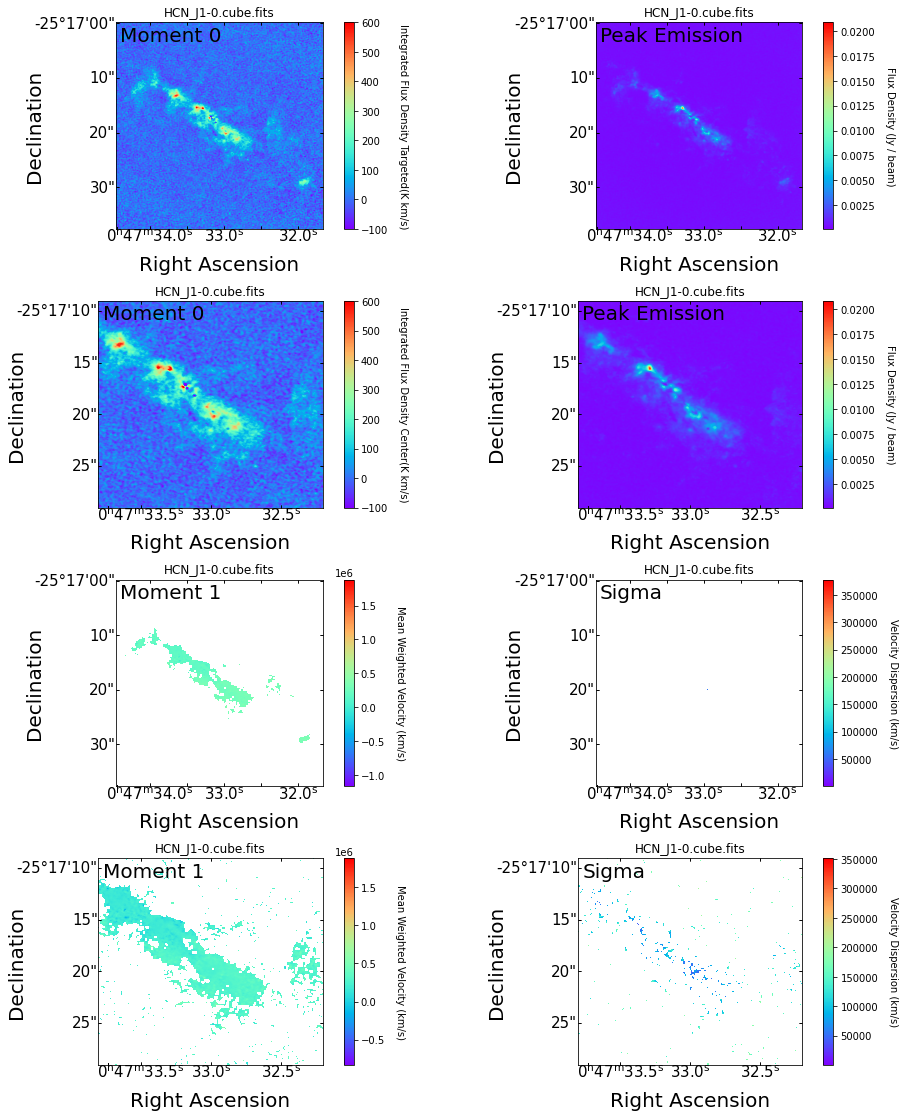

In [111]:
#HCN_J1-0

path = 'HCN_J1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

moment_0  = cube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map   = cube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1  = cube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map = cube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpix = pylab.where(moment_0.hdu.data<10)                 # Get ready to mask the data based on moment map
moment_1.hdu.data[badpix] = np.nan                          # Mask the moment 1 map
sigma_map.hdu.data[badpix] = np.nan                         # Mask the velocity dispersion map

######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
from astropy.coordinates import SkyCoord

cen_p1 = SkyCoord('00h47m33.8s', '-25d17m29s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m09s', frame='icrs')

sc = SpectralCube.read(path)
scW = sc.wcs[:][:][0]
p1Q = scW.pixel_to_world(0,0)
print(p1Q)

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
print(raDP1,raDP2)

subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpixS = pylab.where(moment_0_sub.hdu.data<10)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
ax1 = pylab.subplot(4,2,1,projection=w1) 
RA = ax1.coords[0]                                                                  # 
Dec = ax1.coords[1]
im1 = pylab.imshow(moment_0.hdu.data,cmap='rainbow',vmin=-100,vmax=600)
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax2 = pylab.subplot(4,2,2, projection=w1)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(max_map.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax3 = pylab.subplot(4,2,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=600)

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax4 = pylab.subplot(4,2,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)

ax1.set_title("HCN_J1-0.cube.fits")
ax2.set_title("HCN_J1-0.cube.fits")
ax3.set_title("HCN_J1-0.cube.fits")
ax4.set_title("HCN_J1-0.cube.fits")

#########Moment 1 and Sigma

ax5 = pylab.subplot(4,2,5,projection=w1) 

RA = ax5.coords[0]                                                                  # 
Dec = ax5.coords[1]
im5 = pylab.imshow(moment_1.hdu.data,cmap='rainbow')

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax6 = pylab.subplot(4,2,6, projection=w1)
RA = ax6.coords[0]                                                                  # 
Dec = ax6.coords[1]
im6=pylab.imshow(sigma_map.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax7 = pylab.subplot(4,2,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow')
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')



ax8 = pylab.subplot(4,2,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
fig1.tight_layout(w_pad=10,h_pad=5)
ax5.set_title("HCN_J1-0.cube.fits")
ax6.set_title("HCN_J1-0.cube.fits")
ax7.set_title("HCN_J1-0.cube.fits")
ax8.set_title("HCN_J1-0.cube.fits")
fig1.savefig("NGC253.HCN_J1-0_Integrated_Full_Note.jpeg")


[[-43.58168911 -27.08789339 -14.7082503  ... -25.84563852 -39.69301668
  -48.09341142]
 [-48.0572026  -24.29836976 -14.86015061 ... -40.05691445 -33.20088541
  -25.50754483]
 [-31.33193148  -8.44344673   1.59421332 ... -36.99290637 -13.64235082
   -3.60243455]
 ...
 [-29.41366399 -20.85586646 -29.60851313 ...  13.2574143    7.60769523
   -7.99103024]
 [-16.29869334 -13.44153605 -17.36065771 ...  29.51645404  15.89464079
  -10.91505896]
 [  2.29131277   7.4914318   14.7455733  ...  33.58583144  29.77784954
    9.73612349]] Jy m / (beam s)
[[  244162.51149962   266476.6646319    280714.36611477 ...
    655506.19867428   492174.41964977   392884.10654128]
 [  210842.39567461   250130.64640523   270337.18345927 ...
    480536.7159432    477961.20559845   447770.38181322]
 [  176032.21379173   -83894.45699013  2457848.96173069 ...
    432061.21172825   593063.68174382  1185190.52153049]
 ...
 [  487531.0144329    604206.06339451   471248.274248   ...
     36542.43618689   -48528.49471576   

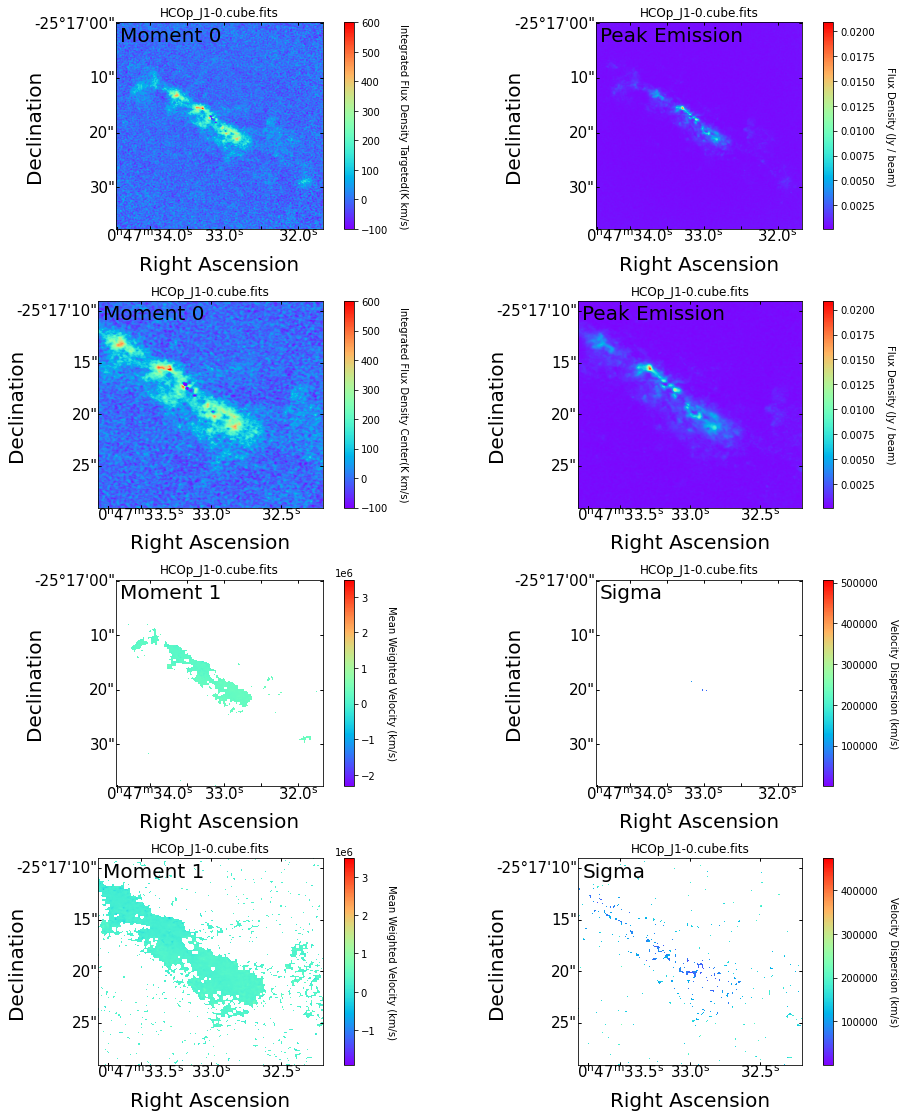

In [149]:
#HCO+_J1-0

path = 'HCOp_J1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

moment_0  = cube.moment(order=0,how='slice')            # Calculate the Moment 0 map 


max_map   = cube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1  = cube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map = cube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 
print(moment_0)
print(moment_1)
print(sigma_map)
print(max_map)
badpix = pylab.where(moment_0.hdu.data<5)                 # Get ready to mask the data based on moment map
moment_1.hdu.data[badpix] = np.nan                          # Mask the moment 1 map
sigma_map.hdu.data[badpix] = np.nan                         # Mask the velocity dispersion map

######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
from astropy.coordinates import SkyCoord

cen_p1 = SkyCoord('00h47m33.8s', '-25d17m29s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m09s', frame='icrs')

sc = SpectralCube.read(path)
scW = sc.wcs[:][:][0]
p1Q = scW.pixel_to_world(0,0)
print(p1Q)

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
print(raDP1,raDP2)

subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpixS = pylab.where(moment_0_sub.hdu.data<5)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
ax1 = pylab.subplot(4,2,1,projection=w1) 
RA = ax1.coords[0]                                                                  # 
Dec = ax1.coords[1]
im1 = pylab.imshow(moment_0.hdu.data,cmap='rainbow',vmin=-100,vmax=600)
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax2 = pylab.subplot(4,2,2, projection=w1)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(max_map.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax3 = pylab.subplot(4,2,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=600)

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax4 = pylab.subplot(4,2,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)

ax1.set_title("HCOp_J1-0.cube.fits")
ax2.set_title("HCOp_J1-0.cube.fits")
ax3.set_title("HCOp_J1-0.cube.fits")
ax4.set_title("HCOp_J1-0.cube.fits")

#########Moment 1 and Sigma

ax5 = pylab.subplot(4,2,5,projection=w1) 

RA = ax5.coords[0]                                                                  # 
Dec = ax5.coords[1]
im5 = pylab.imshow(moment_1.hdu.data,cmap='rainbow')

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax6 = pylab.subplot(4,2,6, projection=w1)
RA = ax6.coords[0]                                                                  # 
Dec = ax6.coords[1]
im6=pylab.imshow(sigma_map.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax7 = pylab.subplot(4,2,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow')
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax8 = pylab.subplot(4,2,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)  
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)
ax5.set_title("HCOp_J1-0.cube.fits")
ax6.set_title("HCOp_J1-0.cube.fits")
ax7.set_title("HCOp_J1-0.cube.fits")
ax8.set_title("HCOp_J1-0.cube.fits")

fig1.savefig("NGC253.HCO+_J1-0_Integrated_Full_Note.jpeg")


<class 'astropy.units.quantity.Quantity'>
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 11.88834416667  -25.28801916667  -349754.2906243  
CRPIX : 551.0  671.0  0.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -8.611111111111e-06  8.611111111111e-06  3375.009270375  
NAXIS : 1221  1221  320


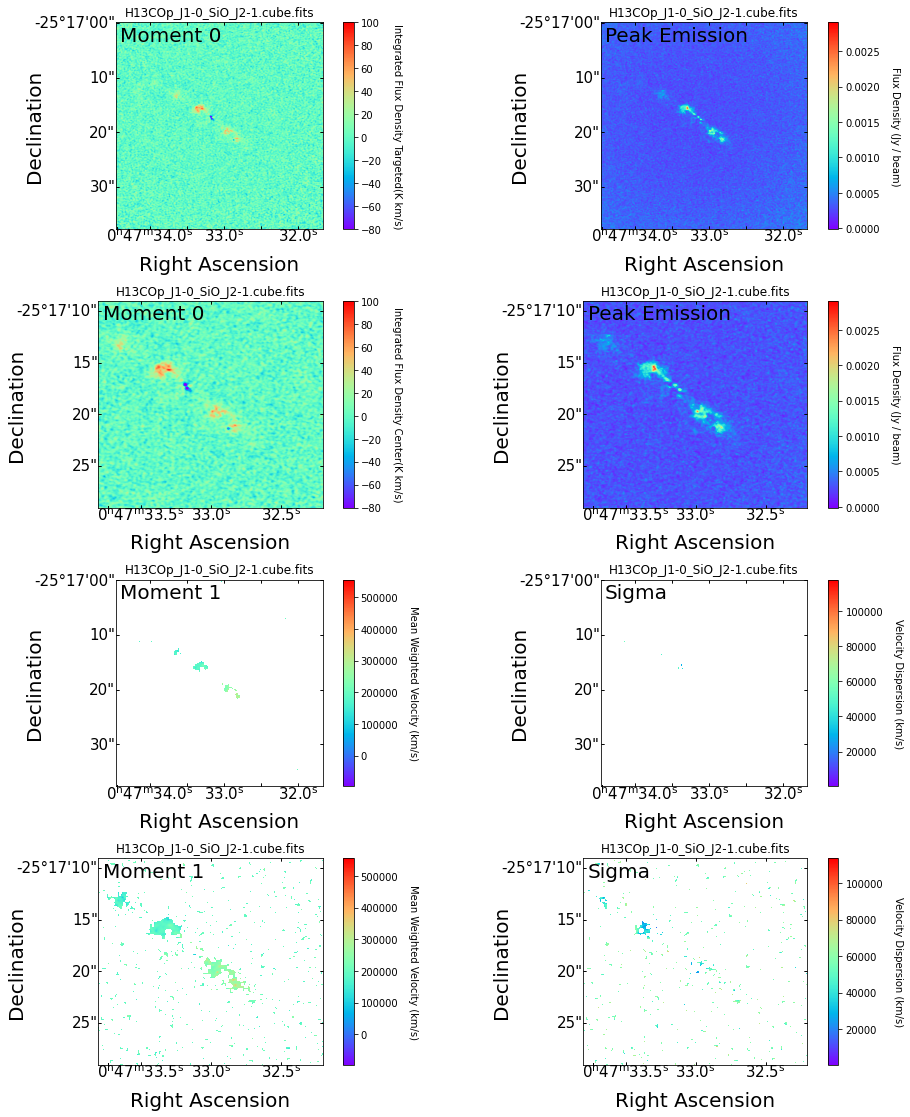

In [128]:




#H13CO+_J1-0, 86.754330 GHz, ref: https://iopscience.iop.org/article/10.1086/497881/pdf


#_and_SiO_J2-1 86.846998 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [-300 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.75428840*u.GHz # rest frequency of H13CO+ J1-0
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency

sc = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.75428840*u.GHz)
cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = cubeB.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


scN = cubeB[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position


scW = scN.wcs[:][:][0]

#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS#.to(u.K)
SC_K_KMS.write("H13CO_Plus_1_0.fits",overwrite=True)

SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(4,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels
fig1 = pylab.figure(1,figsize=(15,15))
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow',vmin=-5,vmax=40)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253.H13CO+_J1-0_CM.jpeg")

<class 'astropy.units.quantity.Quantity'>
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 11.88834416667  -25.28801916667  -349754.2906243  
CRPIX : 551.0  671.0  0.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -8.611111111111e-06  8.611111111111e-06  3375.009270375  
NAXIS : 1221  1221  320


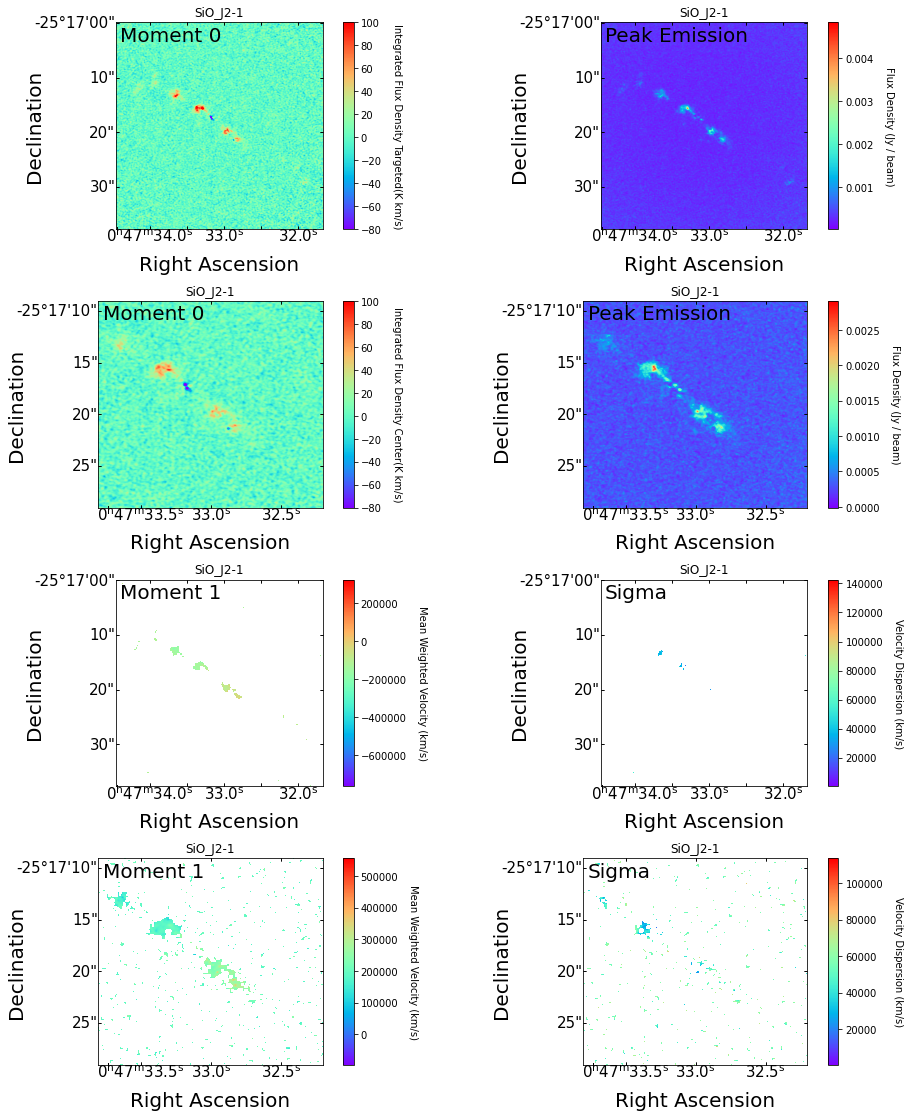

In [129]:


#SiO_J2-1 86.846998 GHz, ref: https://iopscience.iop.org/article/10.1086/497881/pdf

#(and) H13CO+_J1-0, 86.754330 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path) #Load the important axes
#print(cubeB.shape[1])


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.846998*u.GHz # rest frequency 
print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
cube = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency


cheader = fits.getheader(path)  
w1 = WCS(cheader) 
print(w1)
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

moment_0  = cube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map   = cube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1  = cube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map = cube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpix = pylab.where(moment_0.hdu.data<5)                 # Get ready to mask the data based on moment map
moment_1.hdu.data[badpix] = np.nan                          # Mask the moment 1 map
sigma_map.hdu.data[badpix] = np.nan                         # Mask the velocity dispersion map

######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
from astropy.coordinates import SkyCoord

cen_p1 = SkyCoord('00h47m33.8s', '-25d17m29s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m09s', frame='icrs')


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.754330*u.GHz # rest frequency 
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
sc = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency

scW = sc.wcs[:][:][0]
p1Q = scW.pixel_to_world(0,0)
#print(p1Q)

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
#print(raDP1,raDP2)

subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpixS = pylab.where(moment_0_sub.hdu.data<5)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
ax1 = pylab.subplot(4,2,1,projection=w1) 
RA = ax1.coords[0]                                                                  # 
Dec = ax1.coords[1]
im1 = pylab.imshow(moment_0.hdu.data,cmap='rainbow',vmin=-80,vmax=100)
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax2 = pylab.subplot(4,2,2, projection=w1)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(max_map.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax3 = pylab.subplot(4,2,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow',vmin=-80,vmax=100)

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax4 = pylab.subplot(4,2,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)

ax1.set_title("SiO_J2-1")
ax2.set_title("SiO_J2-1")
ax3.set_title("SiO_J2-1")
ax4.set_title("SiO_J2-1")

#########Moment 1 and Sigma

ax5 = pylab.subplot(4,2,5,projection=w1) 

RA = ax5.coords[0]                                                                  # 
Dec = ax5.coords[1]
im5 = pylab.imshow(moment_1.hdu.data,cmap='rainbow')

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax6 = pylab.subplot(4,2,6, projection=w1)
RA = ax6.coords[0]                                                                  # 
Dec = ax6.coords[1]
im6=pylab.imshow(sigma_map.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax7 = pylab.subplot(4,2,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow')
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax8 = pylab.subplot(4,2,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)  
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)
ax5.set_title("SiO_J2-1")
ax6.set_title("SiO_J2-1")
ax7.set_title("SiO_J2-1")
ax8.set_title("SiO_J2-1")

fig1.savefig("NGC253.SiO_J2-1_Integrated_Full_Note.jpeg")


[[ 11.57649627   3.53443435  -5.62412337 ...  77.01826129  72.91310856
   55.68010755]
 [ 17.02360573  17.44233619  12.25224895 ...  56.00759638  58.41124848
   55.86737594]
 [ 28.8589347   41.43801411  40.34887559 ...  44.10002043  61.20295507
   72.23398841]
 ...
 [-46.95893615 -53.93819772 -60.96694295 ... -27.58195116 -17.00743876
  -21.38122072]
 [-63.44305721 -75.17253696 -86.94247129 ... -31.24586404 -36.30947875
  -39.77466741]
 [-75.33841328 -79.96960594 -83.33447315 ... -19.57912712 -40.47693647
  -48.599662  ]] Jy m / (beam s)
[[ 1018588.15669547  3111487.67909381 -1831643.38079135 ...
    277352.37618737   268651.33090593   229647.29272615]
 [  997775.97389625   963443.31722998  1115823.54875879 ...
    261159.71797887   216388.33093477   185726.97112691]
 [  787119.2314925    593950.73068989   500049.96230322 ...
    191325.65475372   170765.02267538   186415.65142202]
 ...
 [  220447.36504354   220339.2814039    258029.02654417 ...
    148161.56960752  -103638.79859575   

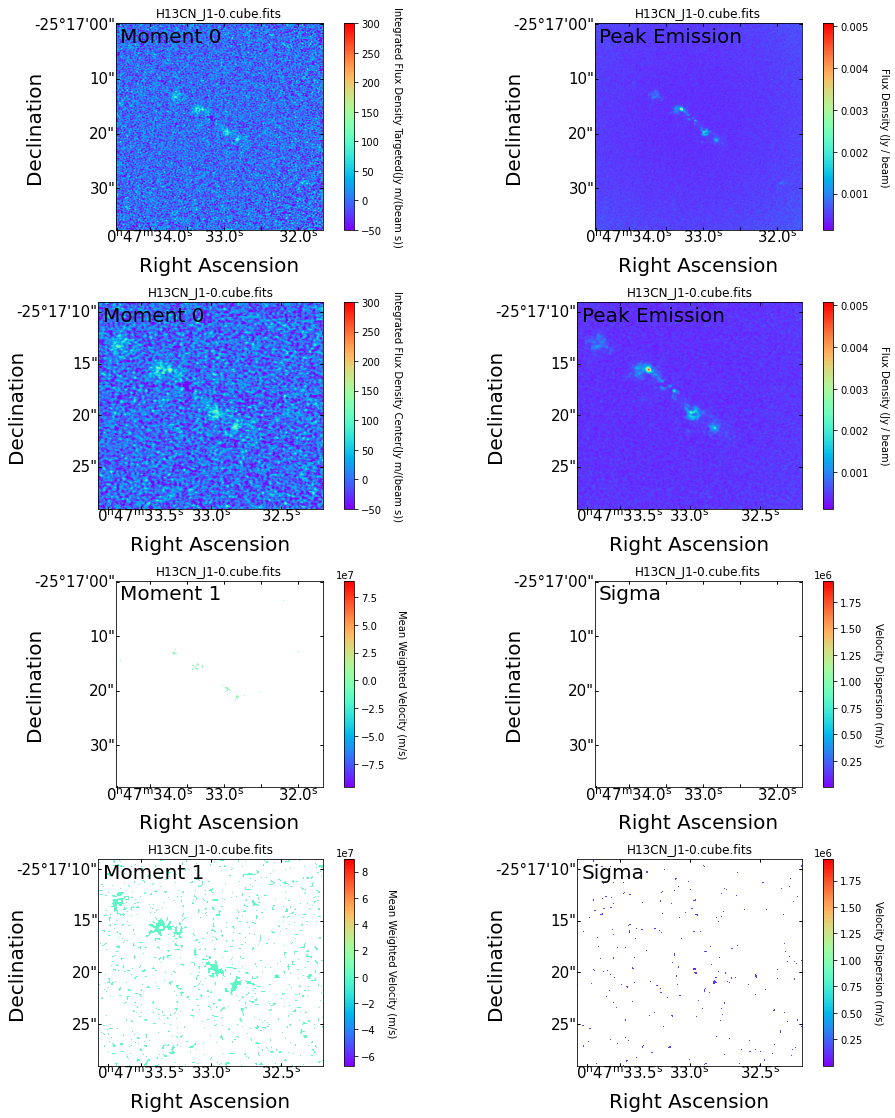

In [474]:
#H13CN_J1-0


path = 'H13CN_J1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

moment_0  = cube.moment(order=0,how='slice')            # Calculate the Moment 0 map 


max_map   = cube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1  = cube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map = cube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 
print(moment_0)
print(moment_1)
print(sigma_map)
print(max_map)
badpix = pylab.where(moment_0.hdu.data<.1)                 # Get ready to mask the data based on moment map
moment_1.hdu.data[badpix] = np.nan                          # Mask the moment 1 map
sigma_map.hdu.data[badpix] = np.nan                         # Mask the velocity dispersion map

######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
from astropy.coordinates import SkyCoord

cen_p1 = SkyCoord('00h47m33.8s', '-25d17m29s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m09s', frame='icrs')

sc = SpectralCube.read(path)
scW = sc.wcs[:][:][0]
p1Q = scW.pixel_to_world(0,0)
print(p1Q)

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
print(raDP1,raDP2)

subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpixS = pylab.where(moment_0_sub.hdu.data<.1)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
ax1 = pylab.subplot(4,2,1,projection=w1) 
RA = ax1.coords[0]                                                                  # 
Dec = ax1.coords[1]
im1 = pylab.imshow(moment_0.hdu.data,cmap='rainbow',vmin=-50,vmax=300)
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax2 = pylab.subplot(4,2,2, projection=w1)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(max_map.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax3 = pylab.subplot(4,2,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow',vmin=-50,vmax=300)

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax4 = pylab.subplot(4,2,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)

ax1.set_title("H13CN_J1-0.cube.fits")
ax2.set_title("H13CN_J1-0.cube.fits")
ax3.set_title("H13CN_J1-0.cube.fits")
ax4.set_title("H13CN_J1-0.cube.fits")

#########Moment 1 and Sigma

ax5 = pylab.subplot(4,2,5,projection=w1) 

RA = ax5.coords[0]                                                                  # 
Dec = ax5.coords[1]
im5 = pylab.imshow(moment_1.hdu.data,cmap='rainbow')

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax6 = pylab.subplot(4,2,6, projection=w1)
RA = ax6.coords[0]                                                                  # 
Dec = ax6.coords[1]
im6=pylab.imshow(sigma_map.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax7 = pylab.subplot(4,2,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow')
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax8 = pylab.subplot(4,2,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)  
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)
ax5.set_title("H13CN_J1-0.cube.fits")
ax6.set_title("H13CN_J1-0.cube.fits")
ax7.set_title("H13CN_J1-0.cube.fits")
ax8.set_title("H13CN_J1-0.cube.fits")

fig1.savefig("NGC253.H13CN_J1-0_Integrated_Full_Note.jpeg")

[[-1.13604551e-05 -4.50277195e-06  6.26257790e-06 ...  4.82025662e-05
   4.89847494e-05  5.13662077e-05]
 [-4.14938009e-05 -3.30482488e-05 -2.32740795e-05 ... -1.82703890e-05
  -2.30975303e-05 -2.80452586e-05]
 [-6.54225769e-05 -6.63872188e-05 -6.27108740e-05 ... -7.51248476e-06
  -9.37210724e-06 -1.48528907e-05]
 ...
 [ 6.56779719e-05  6.75274352e-05  6.79693170e-05 ...  1.04085250e-04
   1.06728322e-04  1.05428837e-04]
 [-4.80091690e-06 -1.89800745e-06  1.97699069e-06 ...  4.38935587e-05
   3.52969265e-05  2.86735590e-05]
 [ 3.23448237e-05  3.36406481e-05  3.11841914e-05 ...  5.05743930e-05
   4.62137537e-05  4.32092608e-05]] Jy m / (beam s)
[[ 651899.70360115 1116312.02870607 -345138.19026697 ...  170698.69387701
   162465.59514705  159857.30702597]
 [ 348122.35099735  340985.72275254  335698.69175159 ...  721801.36169144
   616150.68709666  533539.35431705]
 [ 216793.19529912  222409.289196    230237.82014783 ...  -73610.12643704
    -4770.52933729   56943.86656858]
 ...
 [ 170399.

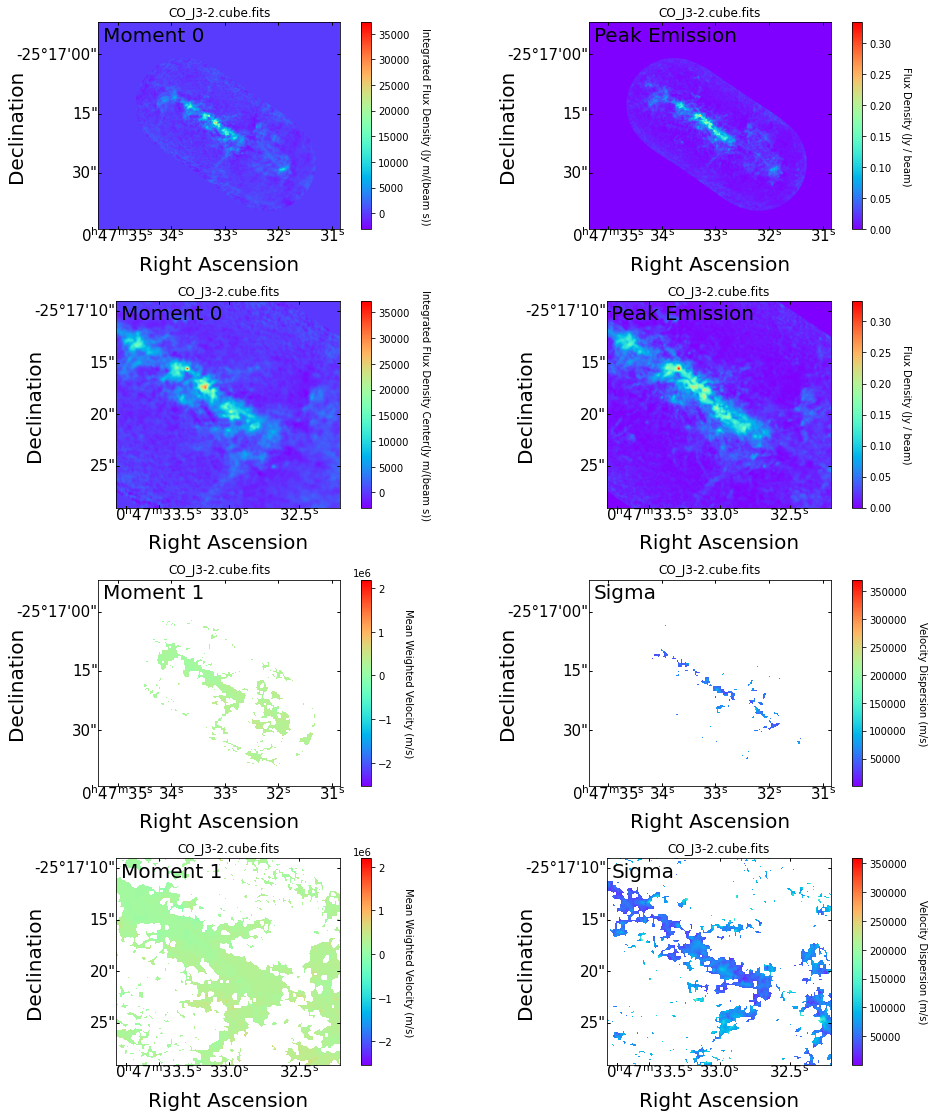

In [475]:
#CO_J3-2


path = 'ngc253_co32_hires_common.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

moment_0  = cube.moment(order=0,how='slice')            # Calculate the Moment 0 map 


max_map   = cube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1  = cube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map = cube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 
print(moment_0)
print(moment_1)
print(sigma_map)
print(max_map)
badpix = pylab.where(moment_0.hdu.data<100)                 # Get ready to mask the data based on moment map
moment_1.hdu.data[badpix] = np.nan                          # Mask the moment 1 map
sigma_map.hdu.data[badpix] = np.nan                         # Mask the velocity dispersion map

######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
from astropy.coordinates import SkyCoord

cen_p1 = SkyCoord('00h47m33.8s', '-25d17m29s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m09s', frame='icrs')

sc = SpectralCube.read(path)
scW = sc.wcs[:][:][0]
p1Q = scW.pixel_to_world(0,0)
print(p1Q)

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
print(raDP1,raDP2)

subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

badpixS = pylab.where(moment_0_sub.hdu.data<100)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
ax1 = pylab.subplot(4,2,1,projection=w1) 
RA = ax1.coords[0]                                                                  # 
Dec = ax1.coords[1]
im1 = pylab.imshow(moment_0.hdu.data,cmap='rainbow')
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density (Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax2 = pylab.subplot(4,2,2, projection=w1)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(max_map.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax3 = pylab.subplot(4,2,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax4 = pylab.subplot(4,2,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)

ax1.set_title("CO_J3-2.cube.fits")
ax2.set_title("CO_J3-2.cube.fits")
ax3.set_title("CO_J3-2.cube.fits")
ax4.set_title("CO_J3-2.cube.fits")

#########Moment 1 and Sigma

ax5 = pylab.subplot(4,2,5,projection=w1) 

RA = ax5.coords[0]                                                                  # 
Dec = ax5.coords[1]
im5 = pylab.imshow(moment_1.hdu.data,cmap='rainbow')

#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')


ax6 = pylab.subplot(4,2,6, projection=w1)
RA = ax6.coords[0]                                                                  # 
Dec = ax6.coords[1]
im6=pylab.imshow(sigma_map.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)


ax7 = pylab.subplot(4,2,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow')
#im1 = pylab.imshow(mom_0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax8 = pylab.subplot(4,2,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
#im2 = pylab.imshow(maxval,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)  
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (m/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')
#pylab.annotate(s='Continuum Contours',fontsize=15,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10,h_pad=5)
ax5.set_title("CO_J3-2.cube.fits")
ax6.set_title("CO_J3-2.cube.fits")
ax7.set_title("CO_J3-2.cube.fits")
ax8.set_title("CO_J3-2.cube.fits")

fig1.savefig("NGC253.CO_J3-2_Integrated_Full_Note.jpeg")

# Part 3: Image Ratios

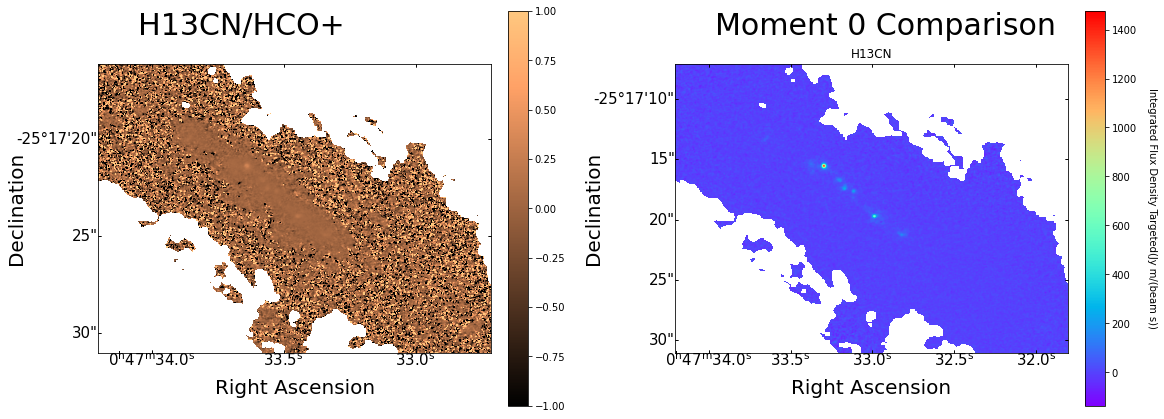

In [463]:

what = "H13CN/HCO+"
top = "H13CN"
#####Zoom in

sc1B = SpectralCube.read('NGC253.HCO+_4-3.pbcor.fits')    

cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
#scWCS = sc1.wcs[:][:][0]
#print(scWCS)
sc2B = SpectralCube.read('NGC253.H13CN_4-3.pbcor.fits')    
sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)

sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 


sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)

                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(15,15))

ax1 = pylab.subplot(1,2,1,projection=scWCS) 
im1 = pylab.imshow(ratio,cmap='copper',vmin=-1,vmax=1)
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
#cb.set_label(label=what,fontsize=10,rotation=0,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=what,fontsize=30,xy=(.1,1.1),xycoords="axes fraction");  
    
# comp momemnt map


subcube = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
scWCS = subcube.wcs[:][:][0]
######Moment 0 


ax2 = pylab.subplot(1,2,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(moment_0_sub.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Moment 0 Comparison',fontsize=30,xy=(.1,1.1),xycoords="axes fraction")  
pylab.tight_layout(w_pad=11,h_pad=0)

ax2.set_title(top)


fig1.savefig("H13CN_Over_HCO_Plus.jpeg")

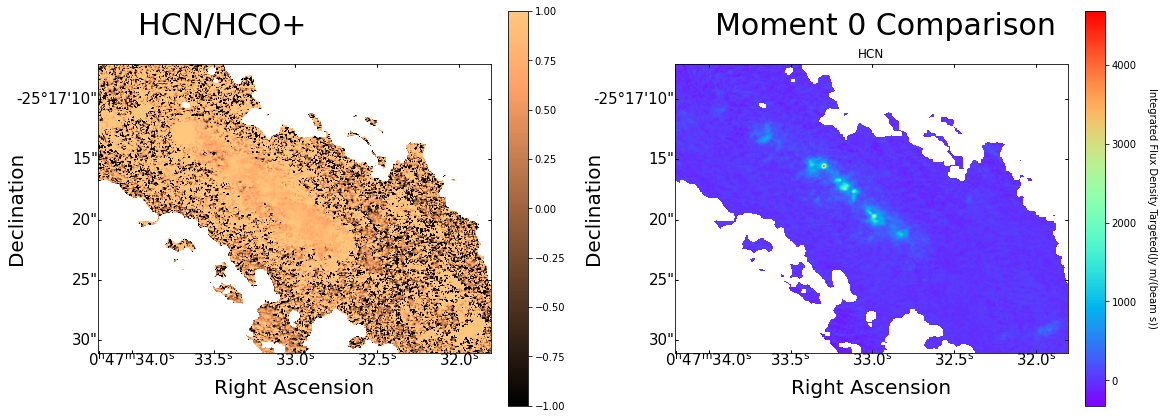

In [464]:

what = "HCN/HCO+"
top = "HCN"
#####Zoom in

sc1B = SpectralCube.read('NGC253.HCO+_4-3.pbcor.fits')    

cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
#scWCS = sc1.wcs[:][:][0]
#print(scWCS)
sc2B = SpectralCube.read('NGC253.HCN_4-3.pbcor.fits')    
sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)

sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 


sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)

                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(15,15))

ax1 = pylab.subplot(1,2,1,projection=scWCS) 
im1 = pylab.imshow(ratio,cmap='copper',vmin=-1,vmax=1)
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
#cb.set_label(label=what,fontsize=10,rotation=0,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=what,fontsize=30,xy=(.1,1.1),xycoords="axes fraction");  
    
# comp momemnt map


subcube = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
scWCS = subcube.wcs[:][:][0]
######Moment 0 


ax2 = pylab.subplot(1,2,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(moment_0_sub.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Moment 0 Comparison',fontsize=30,xy=(.1,1.1),xycoords="axes fraction")  
pylab.tight_layout(w_pad=11,h_pad=0)

ax2.set_title(top)


fig1.savefig("HCN_Over_HCO_Plus.jpeg")

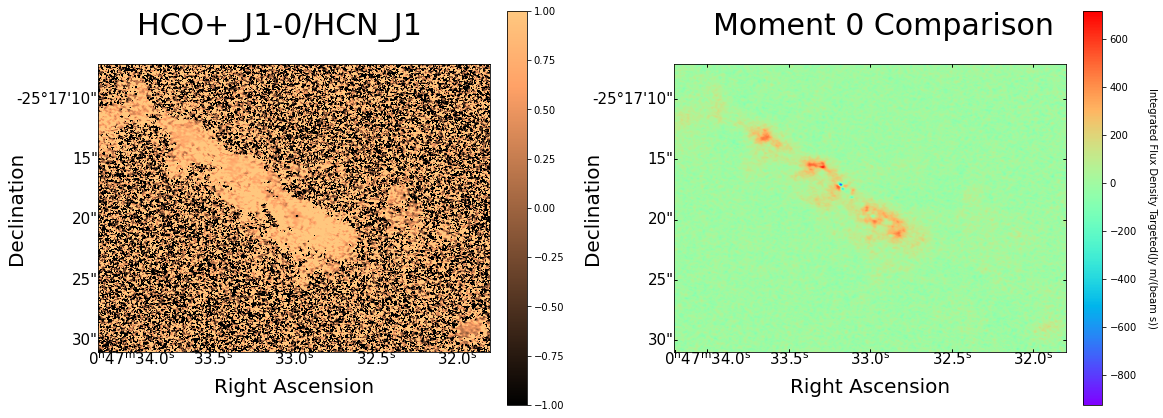

In [477]:


what = "HCO+_J1-0/HCN_J1"
top = "HCO+_J1-0"

#####Zoom in

sc1B = SpectralCube.read('HCN_J1-0.cube.fits')    

cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position


#HCN_J1-0


sc2B = SpectralCube.read('HCOp_J1-0.cube.fits')  

cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc2B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]



sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)

sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 


sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)

                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(15,15))

ax1 = pylab.subplot(1,2,1,projection=scWCS) 
im1 = pylab.imshow(ratio,cmap='copper',vmin=-1,vmax=1)
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
#cb.set_label(label=what,fontsize=10,rotation=0,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=what,fontsize=30,xy=(.1,1.1),xycoords="axes fraction");  
    
#comp momemnt map


subcube = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
scWCS = subcube.wcs[:][:][0]
######Moment 0 


ax2 = pylab.subplot(1,2,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(moment_0_sub.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Moment 0 Comparison',fontsize=30,xy=(.1,1.1),xycoords="axes fraction")  
pylab.tight_layout(w_pad=11,h_pad=0)

ax2.set_title(top)


fig1.savefig("HCO+J1_Over_HCNJ1.jpeg")

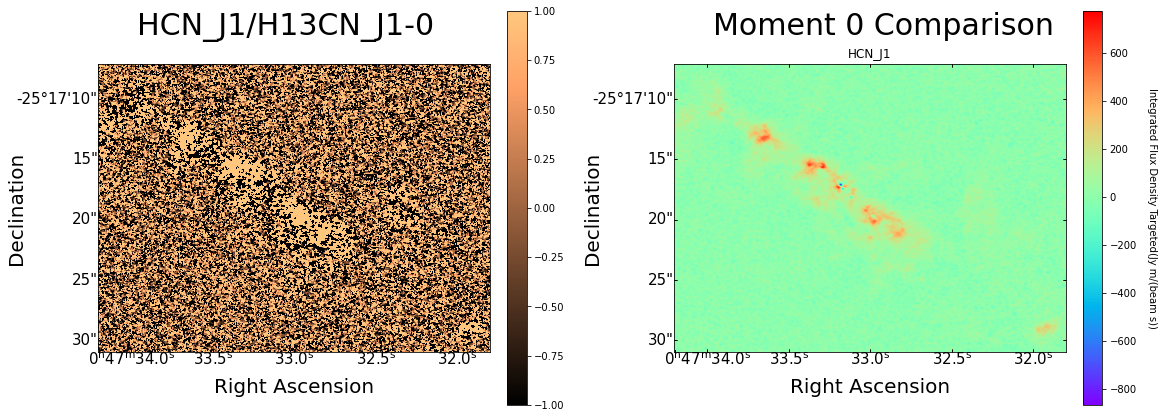

In [480]:


what = "HCN_J1/H13CN_J1-0"
top = "HCN_J1"

#####Zoom in

sc2B = SpectralCube.read('HCN_J1-0.cube.fits')    #Top
sc1B = SpectralCube.read('H13CN_J1-0.cube.fits')  #Bot


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position


#HCN_J1-0




cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc2B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]



sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)

sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 


sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)

                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(15,15))

ax1 = pylab.subplot(1,2,1,projection=scWCS) 
im1 = pylab.imshow(ratio,cmap='copper',vmin=-1,vmax=1)
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
#cb.set_label(label=what,fontsize=10,rotation=0,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=what,fontsize=30,xy=(.1,1.1),xycoords="axes fraction");  
    
#comp momemnt map


subcube = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
scWCS = subcube.wcs[:][:][0]
######Moment 0 


ax2 = pylab.subplot(1,2,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(moment_0_sub.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Integrated Flux Density Targeted(Jy m/(beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Moment 0 Comparison',fontsize=30,xy=(.1,1.1),xycoords="axes fraction")  
pylab.tight_layout(w_pad=11,h_pad=0)

ax2.set_title(top)


fig1.savefig("HCN_J1_Over_H13CNJ1.jpeg")

# Part 4: Channel Maps

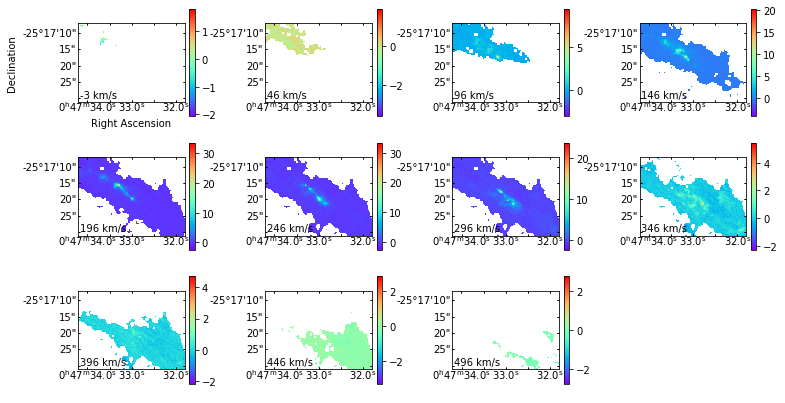

In [502]:


#####Zoom in

sc = SpectralCube.read('NGC253.HCO+_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(20,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(10,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,4,i+1,projection=scW) # We plot them in a grid
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow')
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-2)                                                                                      
    Dec.set_ticks(size=-2) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04) 
    if i==0:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination")
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
        
pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig("NGC253.HCO+_4-3_CM.jpeg")

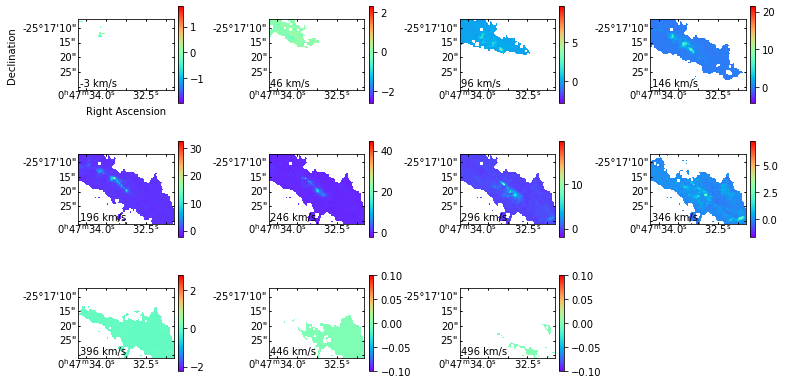

In [503]:


#####Zoom in

sc = SpectralCube.read('NGC253.HCN_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(20,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(10,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,4,i+1,projection=scW) # We plot them in a grid
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow')
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-2)                                                                                      
    Dec.set_ticks(size=-2) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04) 
    if i==0:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination")
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
        
pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig("NGC253.HCN_4-3_CM.jpeg")

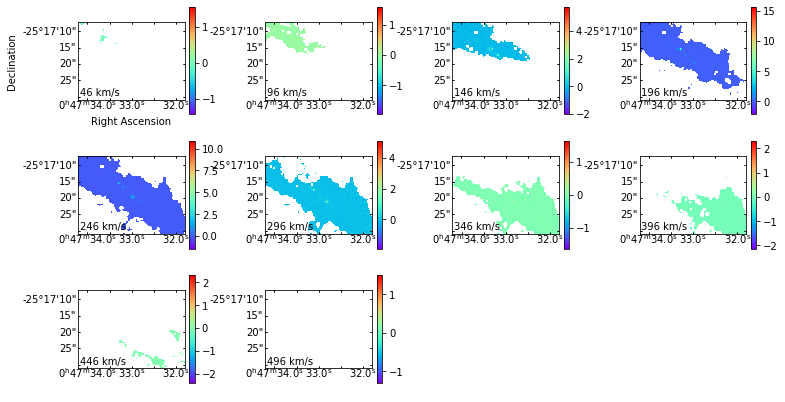

In [504]:


#####Zoom in

sc = SpectralCube.read('NGC253.H13CN_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(20,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(10,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,4,i+1,projection=scW) # We plot them in a grid
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow')
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-2)                                                                                      
    Dec.set_ticks(size=-2) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04) 
    if i==0:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination")
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
        
pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig("NGC253.H13CN_4-3_CM.jpeg")

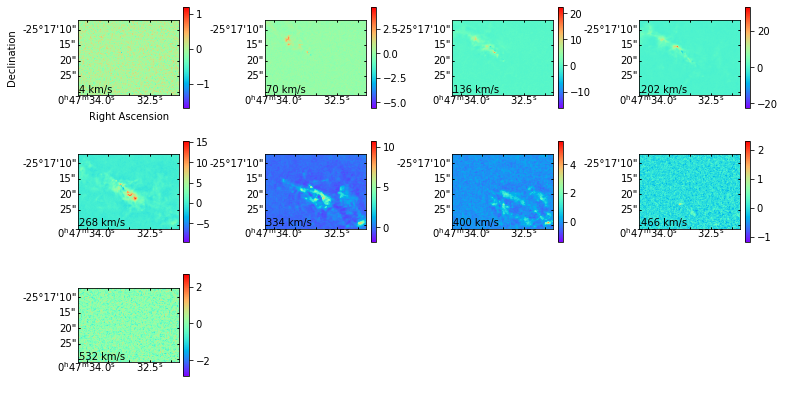

In [505]:


#####Zoom in

sc = SpectralCube.read('HCN_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(20,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(10,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,4,i+1,projection=scW) # We plot them in a grid
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow')
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-2)                                                                                      
    Dec.set_ticks(size=-2) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04) 
    if i==0:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination")
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
        
pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig("NGC253.HCN_J1_CM.jpeg")

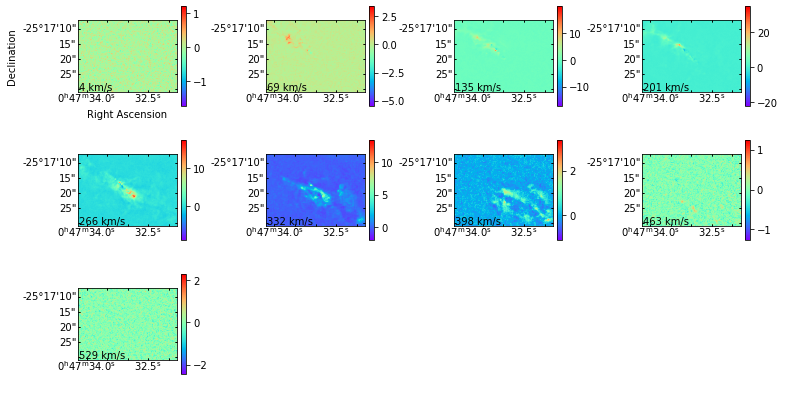

In [506]:


#####Zoom in

sc = SpectralCube.read('HCOp_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(20,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(10,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,4,i+1,projection=scW) # We plot them in a grid
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow')
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-2)                                                                                      
    Dec.set_ticks(size=-2) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04) 
    if i==0:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination")
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
        
pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig("NGC253.HCO+_1-0_CM.jpeg")

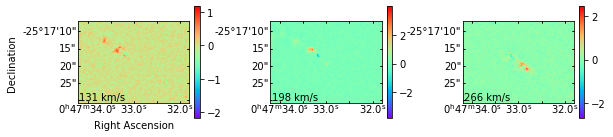

In [527]:




#H13CO+_J1-0, 86.754330 GHz, ref: https://iopscience.iop.org/article/10.1086/497881/pdf


#_and_SiO_J2-1 86.846998 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.754330*u.GHz # rest frequency of H13CO+ J1-0
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
cube = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency

cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = cube.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
#print(raDP1,raDP2)

scN = cube[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position


scW = subcube.wcs[:][:][0]

#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(20,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(10,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,4,i+1,projection=scW) # We plot them in a grid
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow')
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-2)                                                                                      
    Dec.set_ticks(size=-2) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04) 
    if i==0:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination")
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
        
pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig("NGC253.H13CO+_J1-0_CM.jpeg")

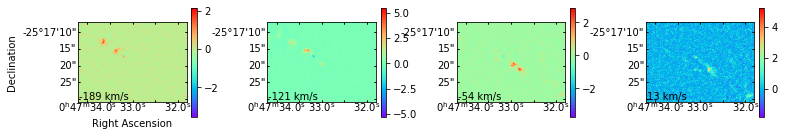

In [529]:
#H13CO+_J1-0, 86.754330 GHz, ref: https://iopscience.iop.org/article/10.1086/497881/pdf


#_and_SiO_J2-1 86.846998 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.846998*u.GHz # rest frequency of SiOJ2-1
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
cube = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency

cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = cube.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
#print(raDP1,raDP2)

scN = cube[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position


scW = subcube.wcs[:][:][0]

#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-500. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(20,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(10,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,4,i+1,projection=scW) # We plot them in a grid
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow')
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-2)                                                                                      
    Dec.set_ticks(size=-2) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04) 
    if i==0:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination")
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
        
pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig("NGC253.SiO_J2-1_CM.jpeg")

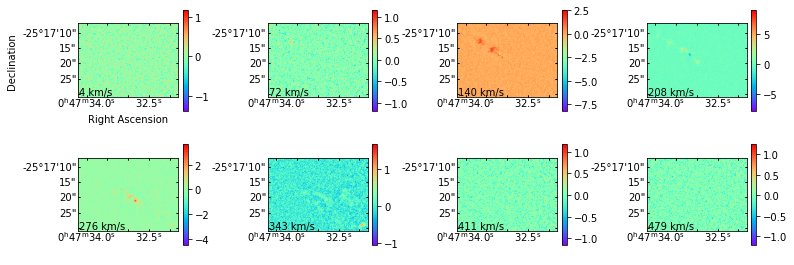

In [509]:


#####Zoom in

sc = SpectralCube.read('H13CN_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(20,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(10,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,4,i+1,projection=scW) # We plot them in a grid
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow')
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-2)                                                                                      
    Dec.set_ticks(size=-2) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04) 
    if i==0:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination")
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
        
pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig("NGC253.H13CN_1-0_CM.jpeg")

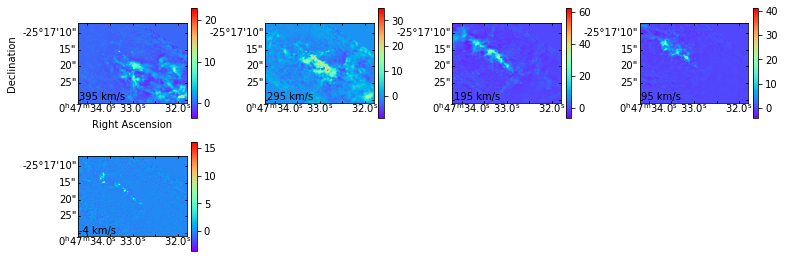

In [510]:


#####Zoom in

sc = SpectralCube.read('ngc253_co32_hires_common.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(20,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(10,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,4,i+1,projection=scW) # We plot them in a grid
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow')
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-2)                                                                                      
    Dec.set_ticks(size=-2) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04) 
    if i==0:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination")
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
        
pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig("NGC253.CO_3-2_CM.jpeg")

# Part 5: PV Plots

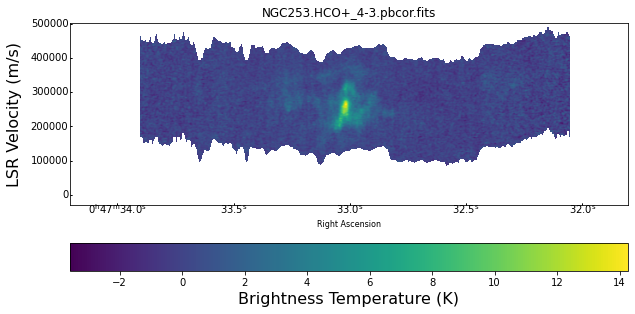

In [514]:
sc = SpectralCube.read('NGC253.HCO+_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=1)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.HCO+_4-3.pbcor.fits")
fig.savefig("NGC253.HCO+_4-3_PV.jpeg")

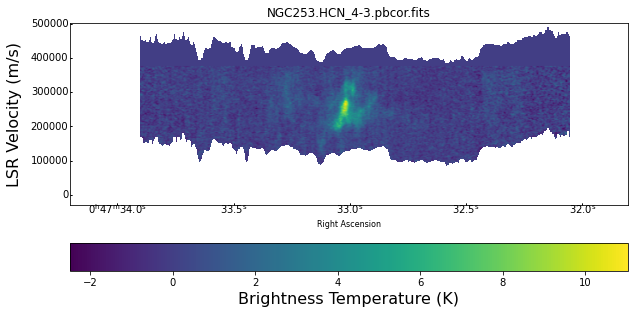

In [513]:
sc = SpectralCube.read('NGC253.HCN_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=1)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.HCN_4-3.pbcor.fits")
fig.savefig("NGC253.HCN_4-3_PV.jpeg")

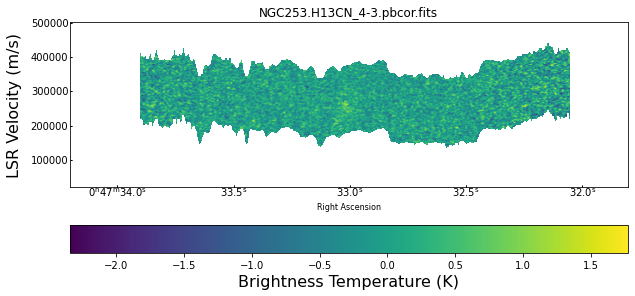

In [515]:
sc = SpectralCube.read('NGC253.H13CN_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=1)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.H13CN_4-3.pbcor.fits")
fig.savefig("NGC253.H13CN_4-3_PV.jpeg")

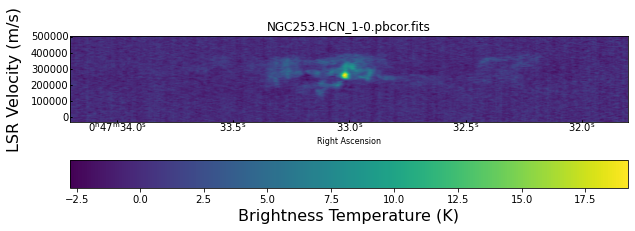

In [516]:
sc = SpectralCube.read('HCN_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=1)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.HCN_1-0.pbcor.fits")
fig.savefig("NGC253.HCN_1-0_PV.jpeg")

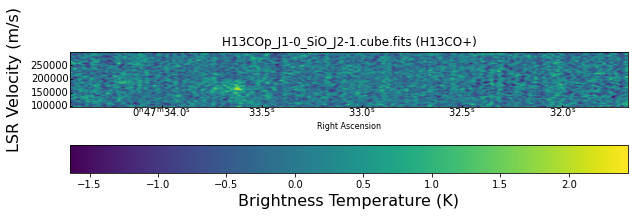

In [530]:
#H13CO+_J1-0, 86.754330 GHz, ref: https://iopscience.iop.org/article/10.1086/497881/pdf


#_and_SiO_J2-1 86.846998 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.754330*u.GHz # rest frequency of H13CO+
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
cube = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency

cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = cube.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)   

scN = cube[:,raDP1[1]:raDP2[1],:] # Make a subcube based on position

#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities


fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=2)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("H13COp_J1-0_SiO_J2-1.cube.fits (H13CO+)")
fig.savefig("NGC253.H13CO+_1-0_PV.jpeg")

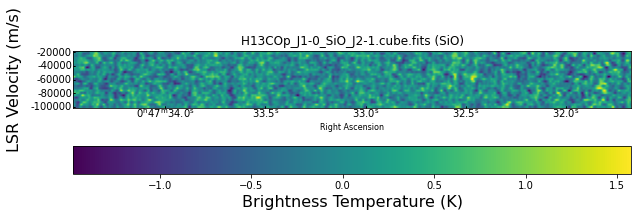

In [531]:
#H13CO+_J1-0, 86.754330 GHz, ref: https://iopscience.iop.org/article/10.1086/497881/pdf


#_and_SiO_J2-1 86.846998 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.846998*u.GHz # rest frequency of SiOJ2-1
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
cube = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency

cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = cube.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)   

scN = cube[:,raDP1[1]:raDP2[1],:] # Make a subcube based on position

#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities


fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=5)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("H13COp_J1-0_SiO_J2-1.cube.fits (SiO)")
fig.savefig("NGC253.SiO_2-1_PV.jpeg")

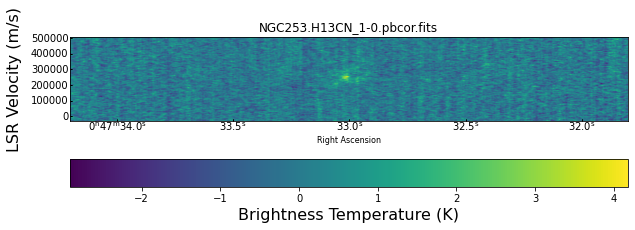

In [519]:
sc = SpectralCube.read('H13CN_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=1)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.H13CN_1-0.pbcor.fits")
fig.savefig("NGC253.H13CN_1-0_PV.jpeg")

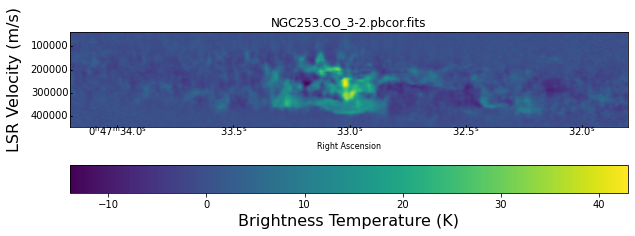

In [518]:
sc = SpectralCube.read('ngc253_co32_hires_common.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=2)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.CO_3-2.pbcor.fits")
fig.savefig("NGC253.CO_3-2_PV.jpeg")

# Part 6: Reporojection

In [538]:
files = pylab.array(['NGC253.HCO+_4-3.pbcor.fits','NGC253.HCN_4-3.pbcor.fits','NGC253.H13CN_4-3.pbcor.fits','HCN_J1-0.cube.fits','HCOp_J1-0.cube.fits','H13CN_J1-0.cube.fits','ngc253_co32_hires_common.fits'])
      
dub='H13COp_J1-0_SiO_J2-1.cube.fits'    


for i,file in enumerate(files):
    
    sc = SpectralCube.read(file)    
    if i==0:                                # Find location of brightest emission
        z,x,y = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data)) 
        #print(x,y,z)
    if i==3:
        ztw,xtw,ytw = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data)) #Find brights for the new cubes
        #print(xtw,ytw,ztw)
    #print(sc.wcs)
    #Need to reduce cube size, but it won't work if theyre all the same size
    if i ==0:
        subcube = sc[:,int(x)-50:int(x)+50,int(y)-50:int(y)+50] # Make a subcube
    if i ==1:
        subcube = sc[:,int(x)-51:int(x)+51,int(y)-51:int(y)+51] # Make a subcube
    if i ==2:
        subcube = sc[:,int(x)-52:int(x)+52,int(y)-52:int(y)+52] # Make a subcube
    if i ==3:
        ztw,xtw,ytw = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data))
        subcube = sc[:,int(xtw)-50:int(xtw)+53,int(ytw)-53:int(ytw)+53] # Make a subcube
        
        #print(xqn,yqn,zqn) #Find new pixels for the subcube
    if i ==4:
        ztw,xtw,ytw = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data))
        subcube = sc[:,int(xtw)-50:int(xtw)+54,int(ytw)-54:int(ytw)+54] # Make a subcube
    if i ==5:
        ztw,xtw,ytw = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data))
        subcube = sc[:,int(xtw)-51:int(xtw)+51,int(ytw)-51:int(ytw)+51] # Make a subcube
        
    if i ==6:
        ztw,xtw,ytw = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data))
        subcube = sc[:,int(xtw)-52:int(xtw)+52,int(ytw)-52:int(ytw)+52] # Make a subcube
        
    
    
    
    if i==1:                                
        zn,xn,yn = pylab.where(subcube.hdu.data==np.nanmax(sc.hdu.data)) 
        #print(xn,yn,zn) #Find new pixels for the subcube
    #print("S,",subcube.wcs)
    
    
    sc_kms = subcube.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
    sc_slab = sc_kms.spectral_slab(-500. *u.km / u.s, 5000. *u.km / u.s)  # Crop out velocities we don't care about

    
    
    sc_slab.allow_huge_operations=True
    
    sc_K_kms = sc_slab.to(u.K)
    
    
    
    if i==0:
        vel, dec, ra = sc_K_kms.world[:,0,0]            # Grab the velocity axis to use for rebinning
        #print(vel)
        NGC_HCO_Plus = sc_K_kms.unmasked_copy()
        NGC_HCO_Plus.write('NGC_HCO_Plus.cube.K-kms.pbcor.fits',overwrite=True)        
        #print(NGC_HCO_Plus.shape)
        #print(NGC_HCO_Plus.wcs)
        
    if i==1:
        NGC_HCN = sc_K_kms.unmasked_copy()
        NGC_HCN.write('NGC253_HCN.cube.reproject.K-kms.pbcor.fits',overwrite=True)
        
        #print(NGC_HCN.shape)
        #print(NGC_HCN.wcs)
    if i==2:
        NGC_H13CN = sc_K_kms.unmasked_copy()#This one needs reprojection
        #print(NGC_H13CN.shape)
        #print(NGC_H13CN.wcs)
    if i==3:
        veln, decn, ran = sc_K_kms.world[:,0,0] #Make a new vel axis because these have different units
        NGC_HCN_J1 = sc_K_kms.unmasked_copy()#And this one is the one that the other new lines will be reprojected onto
        NGC_HCN_J1.write('NGC_HCN_J_1_0.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        #print(NGC_HCN_J1.shape)
        #print(NGC_HCN_J1.wcs)
    if i==4:
        NGC_HCOP_J1 = sc_K_kms.unmasked_copy() #And this one need reprojection
        #print(NGC_HCOP_J1.shape)
        #print(NGC_HCOP_J1.wcs)
    if i==5:
        NGC_H13CN_J1 = sc_K_kms.unmasked_copy() #And this one need reprojection
        #print(NGC_HCOP_J1.shape)
        #print(NGC_HCOP_J1.wcs)
    if i==6:
        NGC_CO_J3_2 = sc_K_kms.unmasked_copy() #And this one need reprojection
        #print(NGC_HCOP_J1.shape)
        #print(NGC_HCOP_J1.wcs)
    

#Make cubes out of the double fits
#CANNOT Reproject one onto the other

sc = SpectralCube.read(dub)

regpix = regions.RectanglePixelRegion(regions.PixCoord(int(sc.shape[1]/2), int(sc.shape[1]/2)), width=int(sc.shape[1]-1), height=int(sc.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.846998*u.GHz # rest frequency of SiJ2-1
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
cubeSi = sc.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
cubeSi.write("TEST2.fits",overwrite=True)

zq2 , xq2 , yq2 = pylab.where(cubeSi.hdu.data==np.nanmax(cubeSi.hdu.data)) #get pixel of highest emission

scW = cubeSi.wcs[:][:][0]

raDH = scW.pixel_to_world(yq2,xq2)#Get ra dec of highest emission
#x is dec y is ra
subcubeSi = cubeSi[:,int(xq2)-50:int(xq2)+50,int(yq2)-50:int(yq2)+50]

zqn2,xqn2,yqn2 = pylab.where(subcubeSi.hdu.data==np.nanmax(cubeSi.hdu.data)) 



sc_kms = subcubeSi.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
sc_slab = sc_kms.spectral_slab(-50000. *u.km / u.s, 500000. *u.km / u.s)  # Crop out velocities we don't care about
sc_slab.allow_huge_operations=True
sc_K_kms = sc_slab.to(u.K)
SiJ2_1 = sc_K_kms.unmasked_copy()
SiJ2_1.write('SiJ2_1.cube.reproject.K-kms.pbcor.fits',overwrite=True) #Save this one since it doesnt need reprojection


#Make H13CoP cube
regpix = regions.RectanglePixelRegion(regions.PixCoord(int(sc.shape[1]/2), int(sc.shape[1]/2)), width=int(sc.shape[1]-1), height=int(sc.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.754330*u.GHz # rest frequency of H13CO+_J1-0, 86.754330 GHz
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
cubeH13CoP = sc.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
scW = cubeH13CoP.wcs[:][:][0]

zq3,xq3,yq3 = pylab.where(cubeH13CoP.hdu.data==np.nanmax(cubeH13CoP.hdu.data)) 
subcubeH13CoP = cubeH13CoP[:,int(xq3)-100:int(xq3)+100,int(yq3)-100:int(yq3)+100]
zqn3,xqn3,yqn3 = pylab.where(subcubeH13CoP.hdu.data==np.nanmax(cubeH13CoP.hdu.data)) #Find new pixel values of the max

sc_kms = subcubeH13CoP.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
sc_slab = sc_kms.spectral_slab(-50000. *u.km / u.s, 500000. *u.km / u.s)  # Crop out velocities we don't care about
sc_slab.allow_huge_operations=True
sc_K_kms = sc_slab.to(u.K)
H13CoPJ1_0 = sc_K_kms.unmasked_copy()

print("done")

done


In [418]:
NGC_H13CN.allow_huge_operations=True
HCOPH = NGC_HCO_Plus.header
NGC_H13CN_reproject = NGC_H13CN.reproject(HCOPH,use_memmap=True)         
NGC_HC13N_reproject_interp = NGC_H13CN_reproject.spectral_interpolate(spectral_grid=vel) # Match velocities too         
NGC_HC13N_reproject_interp.write('NGC_H13CN.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")

YESA


In [419]:

NGC_HCOP_J1.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
NGC_HCOP_J1_reproject = NGC_HCOP_J1.reproject(HCNH,use_memmap=True)         
NGC_HCOP_J1_reproject_interp = NGC_HCOP_J1_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         
NGC_HCOP_J1_reproject_interp.write('NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")

YESA


In [420]:
'''
SiJ2_1.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
SiJ2_1_reproject = SiJ2_1.reproject(HCNH,use_memmap=True)         
SiJ2_1_reproject_interp = SiJ2_1_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         

SiJ2_1_reproject_interp.write('SiJ2_1.cube.reproject.K-kms.pbcor.fits',overwrite=True)         
print("YESA")
'''

'\nSiJ2_1.allow_huge_operations=True\nHCNH = NGC_HCN_J1.header\nSiJ2_1_reproject = SiJ2_1.reproject(HCNH,use_memmap=True)         \nSiJ2_1_reproject_interp = SiJ2_1_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         \n\nSiJ2_1_reproject_interp.write(\'SiJ2_1.cube.reproject.K-kms.pbcor.fits\',overwrite=True)         \nprint("YESA")\n'

In [421]:
'''

H13CoPJ1_0.allow_huge_operations=True

print(np.nanmax(H13CoPJ1_0[:][:][:]))
SIH = SiJ2_1.header
print(SiJ2_1.wcs)
print(H13CoPJ1_0.wcs)
H13CoPJ1_0_reproject = H13CoPJ1_0.reproject(SIH,use_memmap=True)         
print(np.nanmax(H13CoPJ1_0_reproject[:][:][:]))
H13CoPJ1_0_reproject_interp = H13CoPJ1_0_reproject.spectral_interpolate(spectral_grid=velq) # Match velocities too         
print(H13CoPJ1_0_reproject_interp.shape)
print(np.nanmax(H13CoPJ1_0_reproject_interp[:][:][:]))
H13CoPJ1_0_reproject_interp.write('H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")
These ones cannot be reprojected because they have different velocities
'''
H13CoPJ1_0.write('H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits',overwrite=True)

In [539]:
NGC_H13CN_J1.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
NGC_H13CN_J1_reproject = NGC_H13CN_J1.reproject(HCNH,use_memmap=True)         
NGC_H13CN_J1_reproject_interp = NGC_H13CN_J1_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         
NGC_H13CN_J1_reproject_interp.write('NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")

YESA


In [540]:
NGC_CO_J3_2.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
NGC_CO_J3_2_reproject = NGC_CO_J3_2.reproject(HCNH,use_memmap=True)         
NGC_CO_J3_2_reproject_interp = NGC_CO_J3_2_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         
NGC_CO_J3_2_reproject_interp.write('NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")

YESA


In [331]:
#All the cubes have been reprojected

# Part 7: Spectra

(252, 100, 100)
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD-F2F'  
CRVAL : 11.88805833333  -25.2888  -100033.36753975999  
CRPIX : 94.0  -31.0  -28.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -1.388888888889e-05  1.388888888889e-05  2501.6686553348004  
NAXIS : 100  100  252
[51] [51] [100]
(252, 102, 102)
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD-F2F'  
CRVAL : 11.88805833333  -25.2888  -100033.36753973  
CRPIX : 95.0  -30.0  -28.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -1.388888888889e-05  1.388888888889e-05  2501.6686553348004  
NAXIS : 102  102  252
(252, 100, 100)
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD-F2F'  
CRVAL : 11.88805833333  -25.2888  -27484.976535051  
CRPIX : 94.0  -31.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2

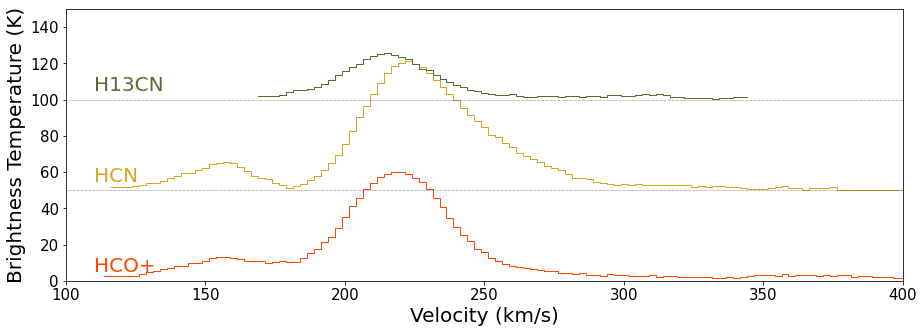

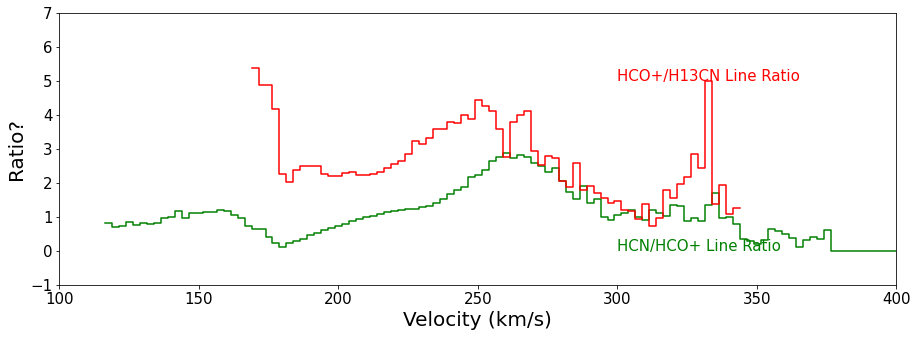

In [422]:
#Plot the first 3 spectra
#NGC_HCO_Plus
#NGC_HCN
#NGC_H13CN
paths = pylab.array(['NGC_HCO_Plus.cube.K-kms.pbcor.fits',
                     'NGC253_HCN.cube.reproject.K-kms.pbcor.fits',
                     'NGC_H13CN.cube.reproject.K-kms.pbcor.fits'])

                                            # Image-dependent plotting variables
scale = pylab.array([1,1,1,1])             # This is a factor for multiplying fainter spectra
colors = pylab.array(['OrangeRed','GoldenRod','DarkOliveGreen','SteelBlue'])
mols = pylab.array(['HCO+','HCN','H13CN','$^{12}$C$^{17}$O']) #labels

                                            # Define the figure outside of loop b/c we don't need to do this 4x!
fig6 = pylab.figure(6,figsize=(15,5))
ax6=pylab.subplot() 
    
                                            # Loop through all 4 images
for i, path in enumerate(paths):
     
    
    sc = SpectralCube.read(path)
    #print(np.shape(sc))
    vel, dec, ra = sc.world[:,0,0]          # For plotting purposes, I want to know the velocity for each channel
    if i==1:                                # Find location of brightest 13CO emission
        zn,xn,yn = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data)) 
        print(xn,yn,zn)
    
                                            # Extract an average spectrum in a 20x20 pixel box
    print(sc.shape)
    print(sc.wcs)
    subcube = sc.hdu.data[:,int(xn)-1:int(xn)+1,int(yn)-1:int(yn)+1] # Make a 20x20xN subcube
    spectrum = np.average(subcube,axis=(1,2))                        # Average in RA and Dec to get 1D spectrum


    if i==0:
        spectrum_13 = spectrum.copy()       # save this to calculate a ratio later
    if i==1:
        spectrum_12 = spectrum.copy()       # save this to calculate a ratio later
    if i==2:
        spectrum_18 = spectrum.copy()       # save this to calculate a ratio later
    if i==3:
        spectrum_17 = spectrum.copy()       # save this to calculate a ratio later
                
        
                                            # plot all spectra    
    ax6.plot(vel,spectrum*scale[i]+i*50,lw=1,drawstyle='steps-mid',color=colors[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.ylim(0,150)
    pylab.xlim(100,400)
    pylab.axhline(i*50,color='black',ls=':',lw=0.5)
    pylab.text(110,i*50+5,mols[i],color=colors[i],fontsize=20)
    if scale[i]!=1:
        pylab.text(-98,i*50+2,"x %i"%scale[i],color=colors[i],fontsize=20)
    ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)


                                            # Plot a figure showing the line ratio
                                            # If we hadn't forced all the images to have the same velocity axis
                                            # using spectral_interpolate this would throw a big error!!
                
badchan13 = pylab.where(spectrum_13 < 0.1)
badchan18 = pylab.where(spectrum_18 < 0.1)


spectrum_13T=spectrum_13.copy()
spectrum_12T=spectrum_12.copy()
spectrum_18T=spectrum_18.copy()



spectrum_13T[badchan13] = np.nan
spectrum_18T[badchan18] = np.nan
#spectrum_17T[badchan17] = np.nan

badchan12 = pylab.where(spectrum_12 < 0.1)
spectrum_12T[badchan12] = np.nan

fig7 = pylab.figure(7,figsize=(15,5))
ax7=pylab.subplot() 
ax7.plot(vel,spectrum_12/spectrum_13,drawstyle='steps-mid',color="Green")
ax7.plot(vel,spectrum_13/spectrum_18,drawstyle='steps-mid',color="Red")
pylab.xlim(100,400)
pylab.ylim(-1,7)
pylab.xlabel('Velocity (km/s)',fontsize=20)
pylab.ylabel('Ratio?',fontsize=20)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)
pylab.text(300,0,"HCN/HCO+ Line Ratio",color="Green",fontsize=15)

pylab.text(300,5,"HCO+/H13CN Line Ratio",color="Red",fontsize=15)
fig6.savefig("NGC_253_Spectra.png")
fig7.savefig("NGC_253_Spectra_Ratio.png")


(180, 103, 106)
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 11.88834416667  -25.28801916667  -27095.992705939  
CRPIX : 93.0  10.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -8.611111111111e-06  8.611111111111e-06  3303.5137611650002  
NAXIS : 106  103  180
(180, 103, 106)
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 11.88834416667  -25.28801916667  -30399.506467104  
CRPIX : 93.0  10.0  0.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -8.611111111111e-06  8.611111111111e-06  3303.5137611650002  
NAXIS : 106  103  180
(180, 103, 106)
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 11.88834416667  -25.28801916667  -27095.992705939  
CRPIX : 93.0  10.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  :

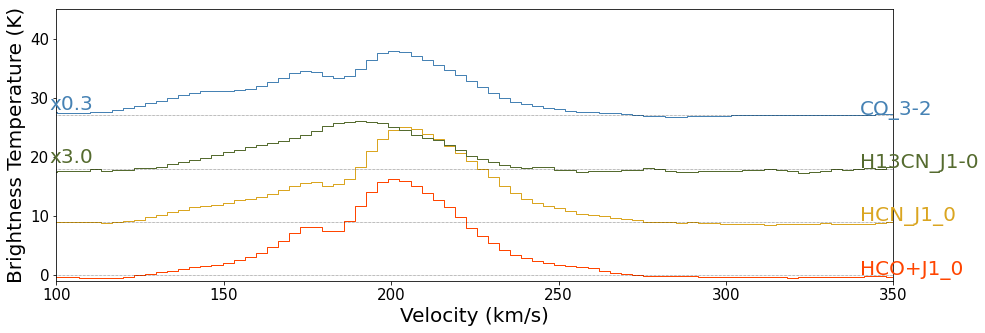

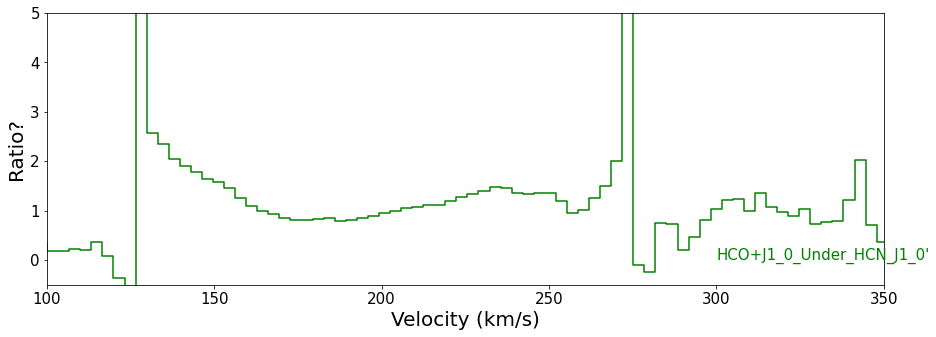

In [546]:
#Plot the other 4 single spectra
#NGC_HCOP_J1
#NGC_HCN_J1
#H13CN_J1-0
#CO_3-2
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J_1_0.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits'])

                                            # Image-dependent plotting variables
scale = pylab.array([1,1,3,.3])             # This is a factor for multiplying fainter spectra
colors = pylab.array(['OrangeRed','GoldenRod','DarkOliveGreen','SteelBlue'])
mols = pylab.array(['HCO+J1_0','HCN_J1_0','H13CN_J1-0',"CO_3-2"]) #labels ,'Si_J2_1','H13CO+_J1_0', removed

fig6 = pylab.figure(6,figsize=(15,5))
ax6=pylab.subplot() 
    
                                            # Loop through all 4 images
for i, path in enumerate(paths):
     
    #print(xqn,yqn)
    sc = SpectralCube.read(path)
    #print(np.shape(sc))
    vel, dec, ra = sc.world[:,0,0]          # For plotting purposes, I want to know the velocity for each channel   
    zqn,xqn,yqn = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data))
                                            # Extract an average spectrum in a 20x20 pixel box
    print(sc.shape)
    print(sc.wcs)
    subcube = sc.hdu.data[:,int(xqn)-20:int(xqn)+20,int(yqn)-20:int(yqn)+20] # Make a 20x20xN subcube
    #print(subcube.shape)
    #print(subcube[0])
    spectrum = np.average(subcube,axis=(1,2))                        # Average in RA and Dec to get 1D spectrum
    #print(spectrum)

    if i==0:
        spectrum_13 = spectrum.copy()       # save this to calculate a ratio later
    if i==1:
        spectrum_12 = spectrum.copy()       # save this to calculate a ratio later
    if i==2:
        spectrum_18 = spectrum.copy()       # save this to calculate a ratio later
    if i==3:
        spectrum_17 = spectrum.copy()       # save this to calculate a ratio later
                
        
                                            # plot all spectra    
    ax6.plot(vel,spectrum*scale[i]+i*9,lw=1,drawstyle='steps-mid',color=colors[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.ylim(-1,45)
    pylab.xlim(100,350)
    pylab.axhline(i*9,color='black',ls=':',lw=0.5)
    pylab.text(340,i*9+.1,mols[i],color=colors[i],fontsize=20)
    if scale[i]!=1:
        pylab.text(98,i*9+1,("x"+str(scale[i])),color=colors[i],fontsize=20)
    ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)


                                            # Plot a figure showing the line ratio
                                            # If we hadn't forced all the images to have the same velocity axis
                                            # using spectral_interpolate this would throw a big error!!
                
badchan13 = pylab.where(spectrum_13 < 0.1)
badchan18 = pylab.where(spectrum_18 < 0.1)


spectrum_13T=spectrum_13.copy()
spectrum_12T=spectrum_12.copy()
#spectrum_18T=spectrum_18.copy()



spectrum_13T[badchan13] = np.nan
#spectrum_18T[badchan18] = np.nan
#spectrum_17T[badchan17] = np.nan

badchan12 = pylab.where(spectrum_12 < 0.1)
spectrum_12T[badchan12] = np.nan

fig7 = pylab.figure(7,figsize=(15,5))
ax7=pylab.subplot() 
ax7.plot(vel,spectrum_12/spectrum_13,drawstyle='steps-mid',color="Green")
#ax7.plot(vel,spectrum_13/spectrum_18,drawstyle='steps-mid',color="Red")
pylab.xlim(100,350)
pylab.ylim(-.5,5)
pylab.xlabel('Velocity (km/s)',fontsize=20)
pylab.ylabel('Ratio?',fontsize=20)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)
pylab.text(300,0,"HCO+J1_0_Under_HCN_J1_0'",color="Green",fontsize=15)

#pylab.text(300,5,"HCO+/H13CN Line Ratio",color="Red",fontsize=15)
fig6.savefig("NGC_253__More_Spectra.png")
fig7.savefig("NGC_253__More_Spectra_Ratio.png")


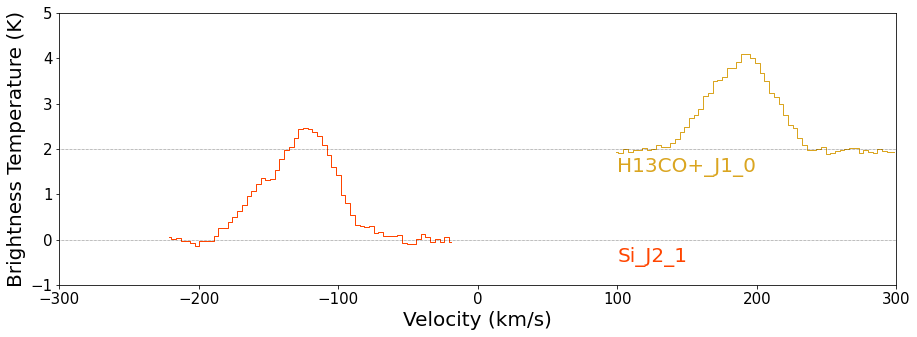

In [428]:
#Plot the double spectra
#
#SiJ2_1 
#                     'SiJ2_1.cube.reproject.K-kms.pbcor.fits',
#                     'H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits'
#H13CoPJ1_0

paths = pylab.array(['SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits'])

                                            # Image-dependent plotting variables
scale = pylab.array([1,1,1,1])             # This is a factor for multiplying fainter spectra
colors = pylab.array(['OrangeRed','GoldenRod','DarkOliveGreen','SteelBlue'])
mols = pylab.array(['Si_J2_1','H13CO+_J1_0']) #labels

fig6 = pylab.figure(6,figsize=(15,5))
ax6=pylab.subplot() 
    
                                            # Loop through all 4 images
for i, path in enumerate(paths):
    
    #print(xqn,yqn)
    sc = SpectralCube.read(path)
    #print(np.shape(sc))
    vel, dec, ra = sc.world[:,0,0]          # For plotting purposes, I want to know the velocity for each channel   
    
                                            # Extract an average spectrum in a 20x20 pixel box
    
    if i ==0:
        subcube = sc.hdu.data[:,int(xqn2)-20:int(xqn2)+20,int(yqn2)-20:int(yqn2)+20] # Make a 20x20xN subcube
    else:
        vel, dec, ra = sc.world[:,0,0]          # For plotting purposes, I want to know the velocity for each channel   
        zz,xx,yy = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data)) 
        subcube = sc.hdu.data[:,int(xx)-20:int(xx)+20,int(yy)-20:int(yy)+20] # Make a 20x20xN subcube
        #Need to make seperate cubes and plots, they are not showing the same area, but they both show their brightest points
        #They have different velocities
    spectrum = np.average(subcube,axis=(1,2))                        # Average in RA and Dec to get 1D spectrum
    #No point in doing ratio 
                
        
                                            # plot all spectra    
    ax6.plot(vel,spectrum*scale[i]+i*2,lw=1,drawstyle='steps-mid',color=colors[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.ylim(-1,5)
    pylab.xlim(-300,300)
    pylab.axhline(i*2,color='black',ls=':',lw=0.5)
    pylab.text(100,i*2-.5,mols[i],color=colors[i],fontsize=20)
    if scale[i]!=1:
        pylab.text(98,i*2+1,"x %i"%scale[i],color=colors[i],fontsize=20)
    ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)


fig6.savefig("NGC_253__EvenMore_Spectra.png")


<Figure size 2160x2160 with 0 Axes>

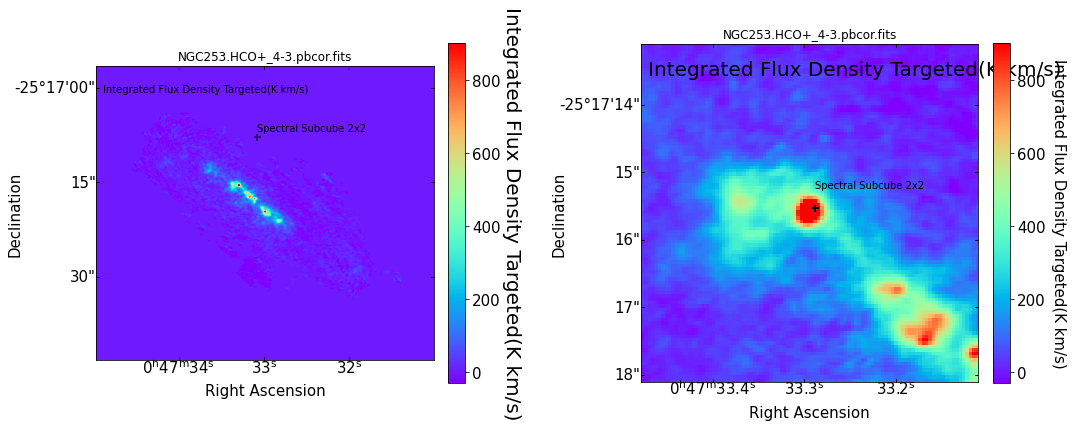

In [168]:
#Spectra's Region, HCOP, HCN, H13CN J4-3

# Image-dependent plotting variables
scale = pylab.array([1,1,1,1])             # This is a factor for multiplying fainter spectra
colors = pylab.array(['OrangeRed','GoldenRod','DarkOliveGreen','SteelBlue'])
mols = pylab.array(['HCO+','HCN','H13CN']) #labels

                                            # Define the figure outside of loop b/c we don't need to do this 4x!
fig6 = pylab.figure(figsize=(30,30))




new_path = 'NGC_HCO_Plus.cube.K-kms.pbcor.fits' 
old_path = "NGC253.HCO+_4-3.pbcor.fits"
cube = SpectralCube.read(old_path)#Get iamge
subcubeN = SpectralCube.read(new_path)#Get iamge #[:,int(x)-20:int(x)+20,int(y)-20:int(y)+20] #Create zoomed cube


cheader = fits.getheader(new_path) 
mom_0 = np.nansum(cube,axis=0)  
maxval = np.nanmax(cube,axis=0)
fig1 = pylab.figure(2,figsize=(15,15))
ax1 = pylab.subplot(2,2,1,projection=cube.wcs[:,:][0]) 
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Spectral Subcube 2x2",(y,x+16))
RA = ax1.coords[0]                                                                  # hi
Dec = ax1.coords[1]
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
im1 = pylab.imshow(mom_0,cmap='rainbow',vmin=-30,vmax=900)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=15,labelpad=1)                               
pylab.ylabel('Declination',fontsize=15,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Targeted(K km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 15)   
pylab.annotate(s='Integrated Flux Density Targeted(K km/s)',fontsize=10,xy=(0.02,0.91),xycoords="axes fraction")  
ax1.set_title("NGC253.HCO+_4-3.pbcor.fits")
fig1.savefig("NGC253_HCO+_With_Lines_Pos_4-3_Integrated.jpeg")



cen_dec1=int(len(mom_0)/2.3)
cen_dec2=int(len(mom_0)/1.5)
cen_ra1=350
cen_ra2=600

ax2 = pylab.subplot(2,2,2,projection=subcubeN.wcs[0]) 
mom_0_Sub = np.nansum(subcubeN,axis=0) 
RA = ax2.coords[0]                                                                  # hi
Dec = ax2.coords[1]
im2 = pylab.imshow(mom_0_Sub,cmap='rainbow',vmin=-30,vmax=900)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)    
pylab.plot(yn,xn,'+',ms=7,mec='black',mfc='black',mew=2,alpha=1)
pylab.annotate("Spectral Subcube 2x2",(yn,xn+6))
pylab.xlabel('Right Ascension',fontsize=15,labelpad=1)                               
pylab.ylabel('Declination',fontsize=15,labelpad=0)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Targeted(K km/s)',fontsize=15,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 15)   
pylab.annotate(s='Integrated Flux Density Targeted(K km/s)',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
ax2.set_title("NGC253.HCO+_4-3.pbcor.fits")
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
#print(sc.wcs)
#print(sc.wcs[cen_dec1:cen_dec2,cen_ra1:cen_ra2][0])
pylab.tight_layout(w_pad=12,h_pad=0)